<a href="https://colab.research.google.com/github/andromeda-22/Exploratory-Data-Analysis-for-Agent-Recruitment-in-Python/blob/main/EDA_agent_recruitmnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore') 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
import plotly.express as px


In [ ]:
data=pd.read_csv('/content/agent_recruitment.csv')

In [ ]:
data[data['Business_Sourced']==1].count()

ID                             3267
Office_PIN                     3267
Application_Receipt_Date       3267
Applicant_City_PIN             3251
Applicant_Gender               3267
Applicant_BirthDate            3267
Applicant_Marital_Status       3267
Applicant_Occupation           2880
Applicant_Qualification        3267
Manager_DOJ                    3031
Manager_Joining_Designation    3031
Manager_Current_Designation    3031
Manager_Grade                  3031
Manager_Status                 3031
Manager_Gender                 3031
Manager_DoB                    3031
Manager_Num_Application        3031
Manager_Num_Coded              3031
Manager_Business               3031
Manager_Num_Products           3031
Manager_Business2              3031
Manager_Num_Products2          3031
Business_Sourced               3267
dtype: int64

In [ ]:
data['Manager_DoB']=pd.to_datetime(data['Manager_DoB'])

In [ ]:
data['Applicant_BirthDate']=pd.to_datetime(data['Applicant_BirthDate'])

In [ ]:
data['Application_Receipt_Date']=pd.to_datetime(data['Application_Receipt_Date'])

In [ ]:

data['App_age']=data['App_age'].fillna(data['App_age'].mean())

KeyError: ignored

In [ ]:
data['App_age']=data['App_age'].astype('int')

KeyError: ignored

In [ ]:
import datetime
mdc='2008-07-01 00:00:00'
mmdc=datetime.datetime.strptime(mdc, '%Y-%m-%d %H:%M:%S')



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           9527 non-null   object        
 1   Office_PIN                   9527 non-null   int64         
 2   Application_Receipt_Date     9527 non-null   datetime64[ns]
 3   Applicant_City_PIN           9430 non-null   float64       
 4   Applicant_Gender             9460 non-null   object        
 5   Applicant_BirthDate          9454 non-null   datetime64[ns]
 6   Applicant_Marital_Status     9454 non-null   object        
 7   Applicant_Occupation         8306 non-null   object        
 8   Applicant_Qualification      9441 non-null   object        
 9   Manager_DOJ                  8844 non-null   object        
 10  Manager_Joining_Designation  8844 non-null   object        
 11  Manager_Current_Designation  8844 non-null 

In [ ]:
mmdc

datetime.datetime(2008, 7, 1, 0, 0)

In [ ]:
data['manager_exp']=mmdc-pd.to_datetime(data['Manager_DOJ'])

In [ ]:
data['manager_age']=mmdc-data['Manager_DoB']

In [ ]:
data['manager_uid']=data['Manager_DoB'].astype('str')+data['Manager_Num_Coded'].astype('str')+data['Manager_Grade'].astype('str')

In [ ]:
data['manager_uid'].nunique()

NameError: ignored

No of products sold by the maangers


In [ ]:
 # custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
 
 
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

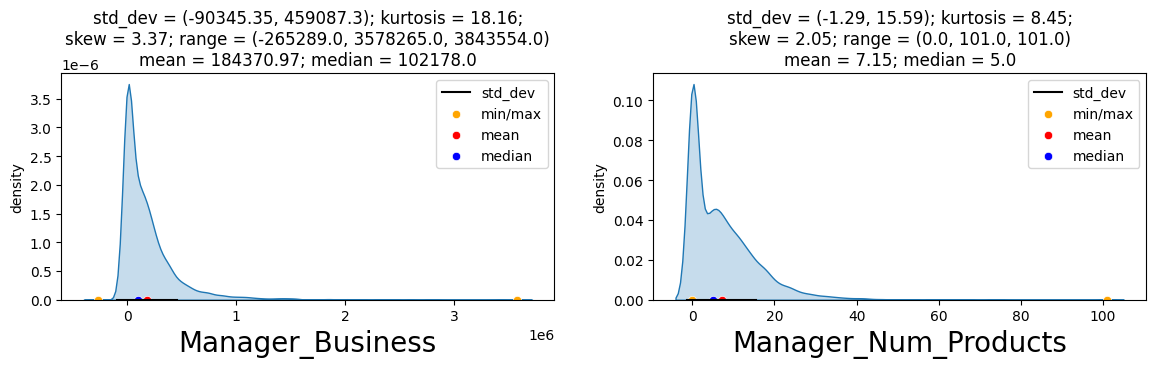

In [ ]:
man_bus=['Manager_Business', 'Manager_Num_Products']
UVA_numeric(data, man_bus)

In [ ]:
data['manager_uid'].nunique()


2660

In [ ]:
data['manager_uid']=data['manager_uid'].astype('category')


In [ ]:
mbp=data.groupby('manager_uid')['Manager_Business'].mean()
mbp=mbp.to_frame()
mbp=mbp.reset_index()


In [ ]:
mbp[mbp['Manager_Business']<300000].count()

manager_uid         2206
Manager_Business    2206
dtype: int64

In [ ]:
mbp[mbp['Manager_Business']<0].count()

manager_uid         2
Manager_Business    2
dtype: int64

In [ ]:
mnp=data.groupby('manager_uid')['Manager_Num_Products'].mean()
mnp=mnp.to_frame()
mnp=mnp.reset_index()


In [ ]:
mnp[mnp['Manager_Num_Products']<7].count()

manager_uid             1632
Manager_Num_Products    1632
dtype: int64

In [ ]:
mnp[mnp['Manager_Num_Products']>50].count()

manager_uid             2
Manager_Num_Products    2
dtype: int64

In [ ]:
data.groupby('Manager_Business_cat')[data['manager_uid'].unique()].count()

TypeError: ignored



*   The average business sourced by manager is 184370
*   68.34% of the managers hav ebelow average business in last 3 months
*   2 managers are running under losses
*   The average number of products sold by managers in the last three months is 7
*   61.3% of the managers have sold less than 7 products in last three months









In [ ]:
dd=data.dropna()
fig = px.bar(dd, x=dd['Manager_Grade'], y=dd['Manager_Business'], color=dd['Manager_Gender'])
fig.show()

Manager_Business_cat,Below Average,Above_Average,High
Manager_Grade,,,
1.0,12.500000,87.500000,NaN
2.0,79.716599,17.773279,2.510121
3.0,67.322712,27.522649,5.154639
4.0,63.931204,26.093366,9.975430
5.0,36.102719,36.102719,27.794562
6.0,26.600985,35.714286,37.684729
7.0,36.363636,22.727273,40.909091
8.0,57.142857,NaN,42.857143
9.0,85.714286,NaN,14.285714


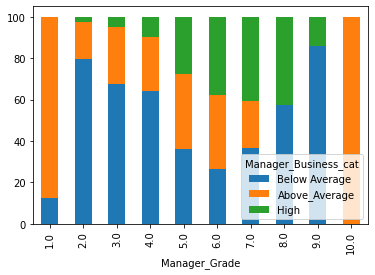

In [ ]:
k=pd.crosstab(index=data['Manager_Grade'], columns=data['Manager_Business_cat'], aggfunc='count', values=data['ID'])
k_perc=k.apply(lambda r: (r/r.sum())*100, axis=1)
k_perc
k_perc.plot.bar(stacked=True)
k_perc

In [ ]:
bins= [0,184370,500000,3843554]
labels = ['Below Average','Above_Average', 'High']
data['Manager_Business_cat'] = pd.cut(data['Manager_Business'], bins=bins, labels=labels, right=False)
data.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,manager_exp,manager_age,manager_uid,Manager_Business_cat
0,FIN1000001,842001,2007-04-16,844120.0,M,1971-12-19,M,Others,Graduate,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,0,964 days,11092 days,1978-02-171.03.0,Above_Average
1,FIN1000002,842001,2007-04-16,844111.0,M,1983-02-17,S,Others,Class XII,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,1,964 days,11092 days,1978-02-171.03.0,Above_Average
2,FIN1000003,800001,2007-04-16,844101.0,M,1966-01-16,M,Business,Class XII,5/27/2006,Level 1,Level 1,2.0,Confirmation,M,1969-03-03,0.0,0.0,357184.0,24.0,357184.0,24.0,0,766 days,14365 days,1969-03-030.02.0,Above_Average
3,FIN1000004,814112,2007-04-16,814112.0,M,1988-02-03,S,Salaried,Class XII,8/21/2003,Level 1,Level 3,4.0,Confirmation,F,1978-08-14,0.0,0.0,318356.0,22.0,318356.0,22.0,0,1776 days,10914 days,1978-08-140.04.0,Above_Average
4,FIN1000005,814112,2007-04-16,815351.0,M,1985-07-04,M,Others,Class XII,5/8/2006,Level 1,Level 1,2.0,Confirmation,M,1971-02-07,2.0,1.0,230402.0,17.0,230402.0,17.0,0,785 days,13659 days,1971-02-071.02.0,Above_Average


In [ ]:
bins= [0,7,15,102]
labels = ['Below Average','Above Average','High']
data['Manager_npr_cat'] = pd.cut(data['Manager_Num_Products'], bins=bins, labels=labels, right=False)
data.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,manager_exp,manager_age,manager_uid,Manager_Business_cat,Manager_npr_cat
0,FIN1000001,842001,2007-04-16,844120.0,M,1971-12-19,M,Others,Graduate,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,0,964 days,11092 days,1978-02-171.03.0,Above_Average,High
1,FIN1000002,842001,2007-04-16,844111.0,M,1983-02-17,S,Others,Class XII,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,1,964 days,11092 days,1978-02-171.03.0,Above_Average,High
2,FIN1000003,800001,2007-04-16,844101.0,M,1966-01-16,M,Business,Class XII,5/27/2006,Level 1,Level 1,2.0,Confirmation,M,1969-03-03,0.0,0.0,357184.0,24.0,357184.0,24.0,0,766 days,14365 days,1969-03-030.02.0,Above_Average,High
3,FIN1000004,814112,2007-04-16,814112.0,M,1988-02-03,S,Salaried,Class XII,8/21/2003,Level 1,Level 3,4.0,Confirmation,F,1978-08-14,0.0,0.0,318356.0,22.0,318356.0,22.0,0,1776 days,10914 days,1978-08-140.04.0,Above_Average,High
4,FIN1000005,814112,2007-04-16,815351.0,M,1985-07-04,M,Others,Class XII,5/8/2006,Level 1,Level 1,2.0,Confirmation,M,1971-02-07,2.0,1.0,230402.0,17.0,230402.0,17.0,0,785 days,13659 days,1971-02-071.02.0,Above_Average,High


In [ ]:
c=pd.crosstab(index=data['Manager_Business_cat'], columns=data['Manager_Gender'], aggfunc='count', values=data[''])
c.plot.bar(stacked=True)
plt.legend(title='Credit_Product_Availed')
plt.show()

KeyError: ignored

Text(0, 0.5, 'Business Sourced')

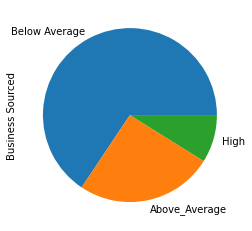

In [ ]:
m=data.groupby(['Manager_Business_cat']).count()['manager_uid']
mt=m.plot(kind='pie')
mt.set_ylabel('Business Sourced')

Text(0, 0.5, 'Business Sourced by manager')

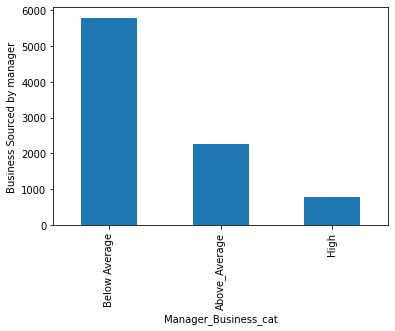

In [ ]:
m=data.groupby(['Manager_Business_cat']).count()['manager_uid']
mt=m.plot(kind='bar')
mt.set_ylabel('Business Sourced by manager')

Text(0, 0.5, 'No of Products Sold')

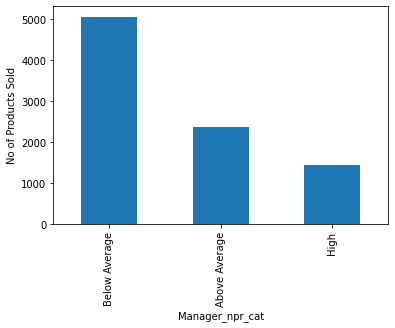

In [ ]:
m=data.groupby(['Manager_npr_cat']).count()['manager_uid']
mt=m.plot(kind='bar')
mt.set_ylabel('No of Products Sold')

In [ ]:
m

Manager_npr_cat
Below Average    5058
Above Average    2365
High             1421
Name: manager_uid, dtype: int64

Text(0, 0.5, 'Products Sold')

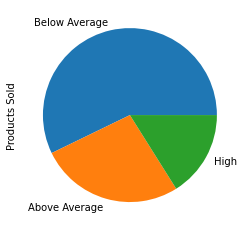

In [ ]:
m=data.groupby(['Manager_npr_cat']).count()['manager_uid']
mt=m.plot(kind='pie')
mt.set_ylabel('Products Sold')

In [ ]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

In [ ]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [ ]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [ ]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

In [ ]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

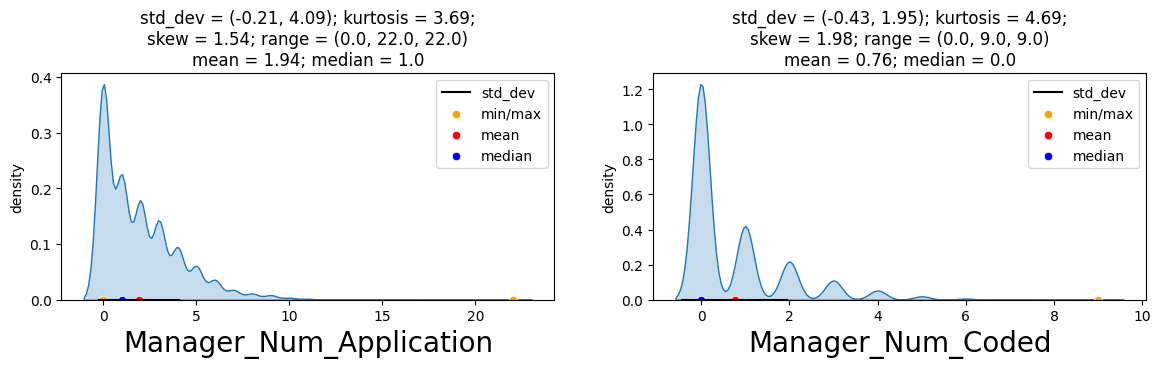

In [ ]:
man_hire=['Manager_Num_Application', 'Manager_Num_Coded']
UVA_numeric(data, man_hire)

In [ ]:
act=pd.crosstab(index=data['Manager_Business_cat'], columns=data['Manager'], aggfunc='count', values=data['Is_Lead'])
act.plot.bar(stacked=True)
plt.legend(title='Is_Active')
plt.show()

**Is there a significant difference in the age group of  agents hired?**

In [ ]:
data['App_age']=(data['Application_Receipt_Date']-data['Applicant_BirthDate'])/np.timedelta64(1,'Y')

In [ ]:
data['Manager_age']=(mmdc-data['Manager_DoB'])/np.timedelta64(1,'Y')

In [ ]:
data['Manager_age']=data['Manager_age'].fillna(data['Manager_age'].mean())

In [ ]:
data['App_age']=data['App_age'].fillna(data['App_age'].mean())
data['App_age']=data['App_age'].astype('int')


In [ ]:
data['Manager_age']=data['Manager_age'].astype('int')

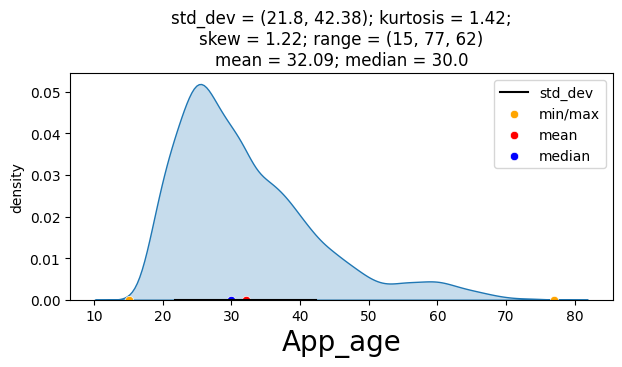

In [ ]:
UVA_numeric(data, ['App_age'])

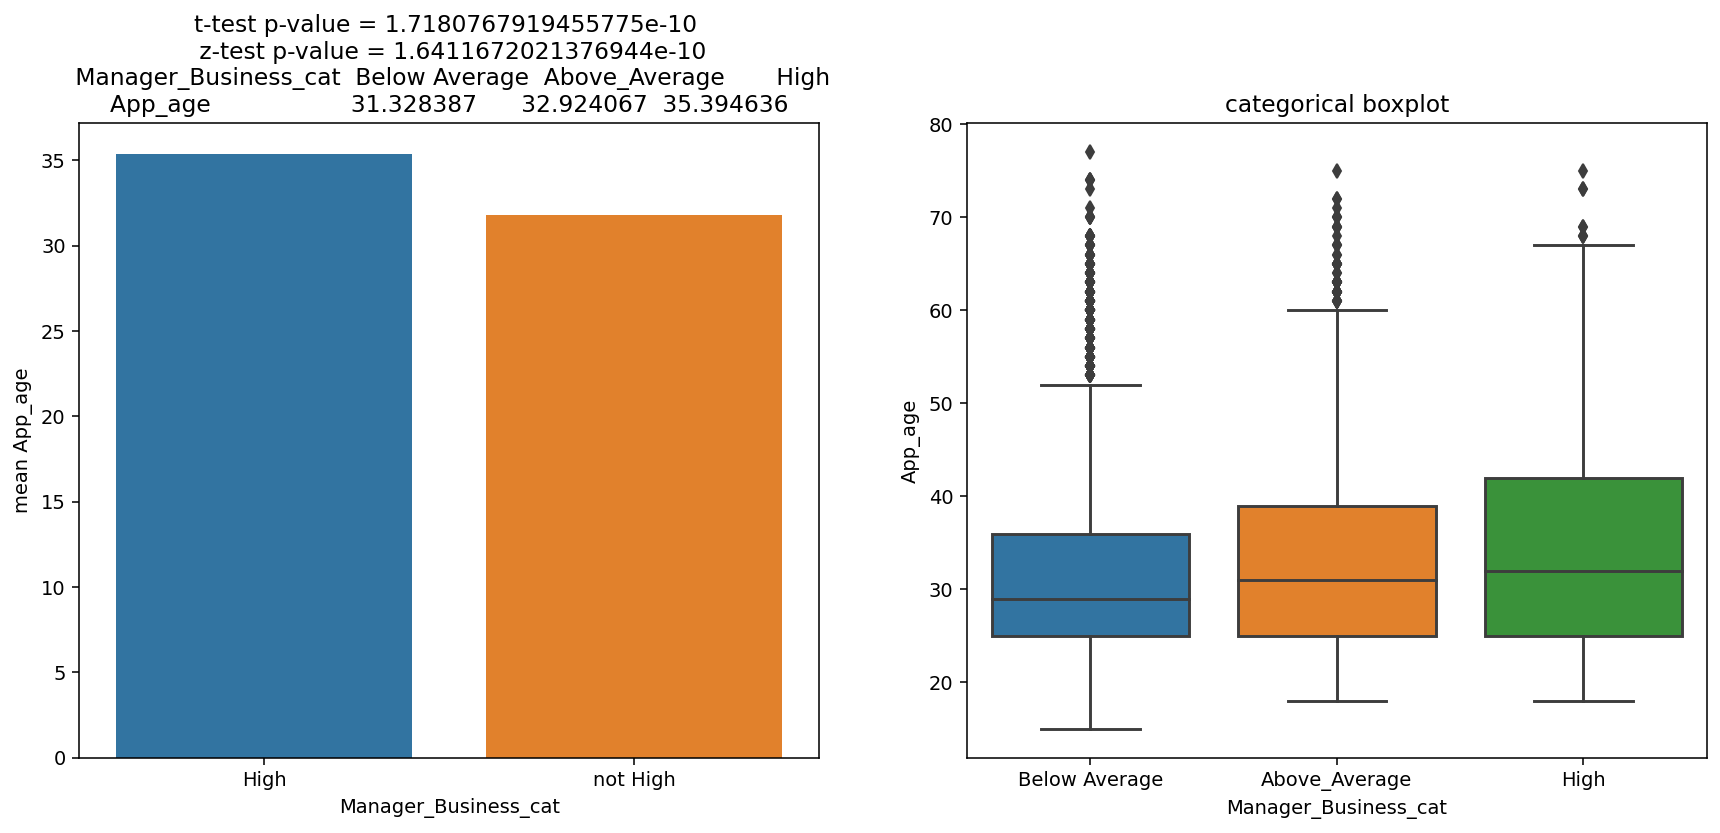

In [ ]:
Bivariate_cont_cat(data, 'App_age', 'Manager_Business_cat', 'High')



*   P value in the case is extrememly small, hence the difference is highly significant 
*   Those managers who have below average business are either hiring very young candidates (25-35) or very old candidates (above 50 years). Hence the poor performance
*   Managers with the highest business, have recruited most of the cadidates between 30-40, with very few old candidates. It is clearly visible in terms of outiers






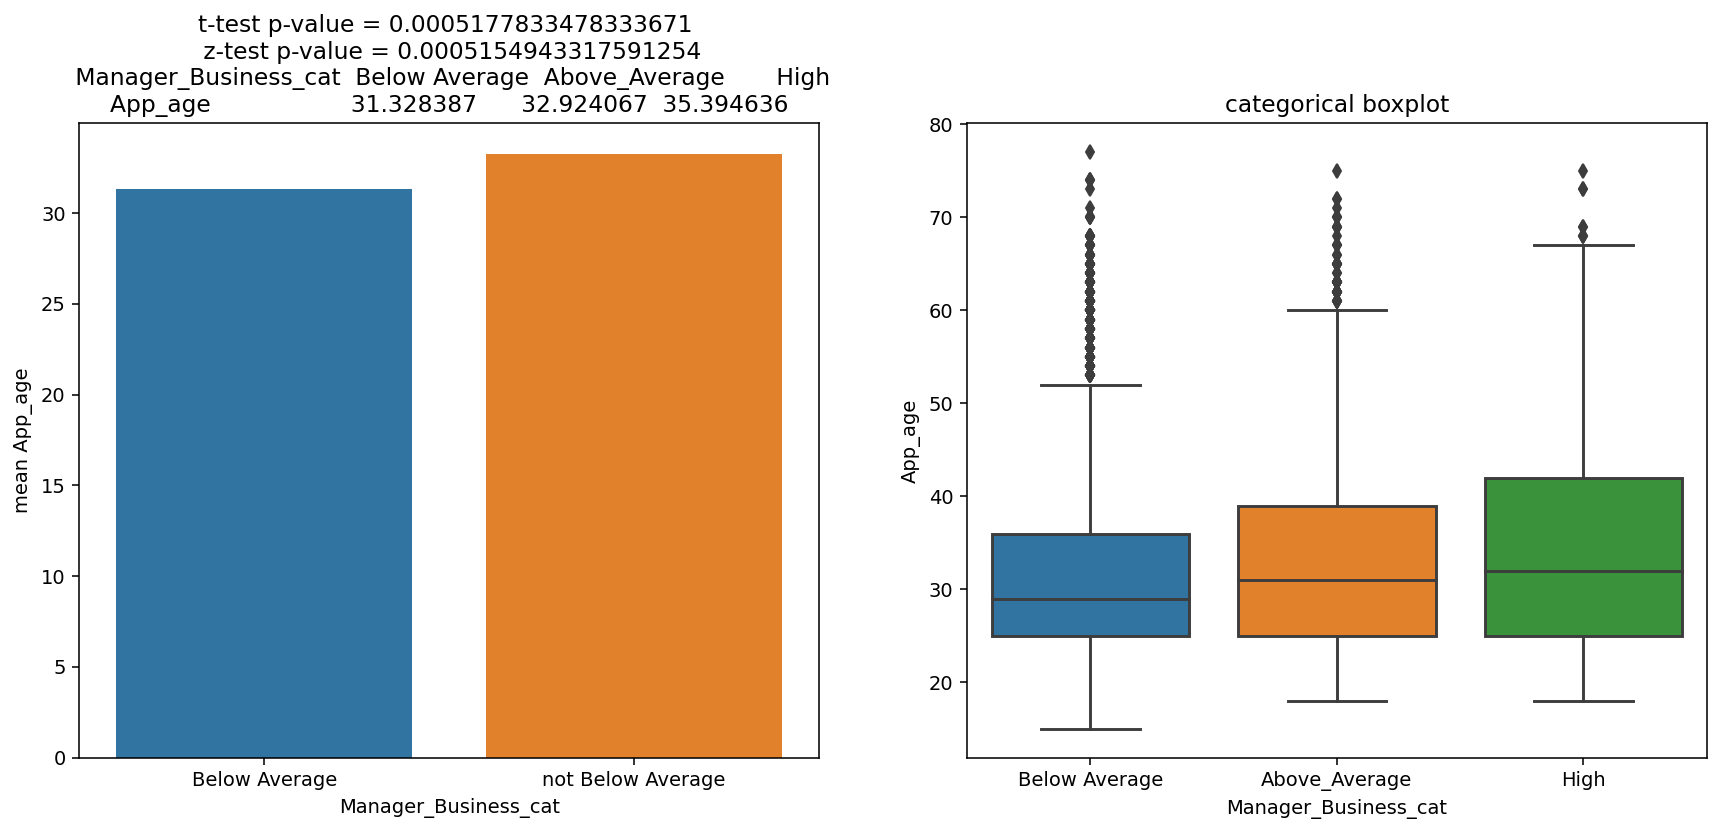

In [ ]:
Bivariate_cont_cat(data, 'App_age', 'Manager_Business_cat', 'Below Average')

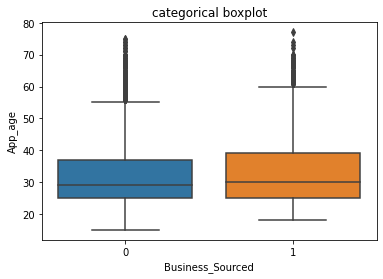

In [ ]:
sns.boxplot(x=data['Business_Sourced'], y=data['App_age'], data=data)
plt.title('categorical boxplot')
plt.show()

In [ ]:
ba=data[data['Manager_Business_cat']=='Below Average']
aa=data[data['Manager_Business_cat']=='Above Average']
h=data[data['Manager_Business_cat']=='High']

In [ ]:
aa=data[data['Manager_Business_cat']=='Above_Average']


In [ ]:
def Grouped_Box_Plot(data, cont, cat1, cat2):
    # boxplot
    sns.boxplot(x=cat1, y=cont, hue=cat2, data=data, orient='v')
    plt.title('Boxplot')

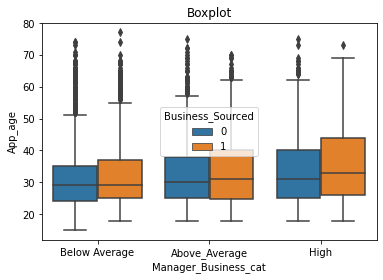

In [ ]:
Grouped_Box_Plot(data, 'App_age', 'Manager_Business_cat', 'Business_Sourced')

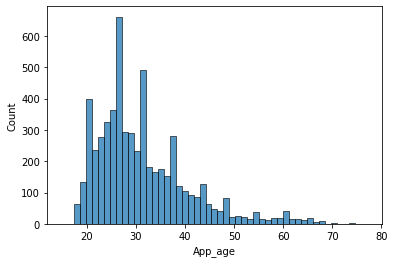

In [ ]:
sns.histplot(data=ba, x='App_age')

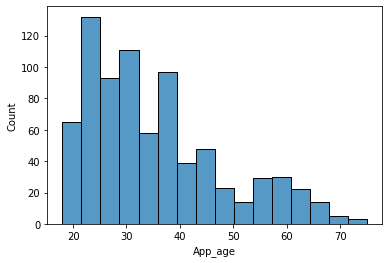

In [ ]:
sns.histplot(data=h, x='App_age')

In [ ]:
mb=data.groupby('manager_uid')['Manager_Business'].mean()
mb=mb.to_frame()
mb=mb.reset_index()
mb

,manager_uid,Manager_Business
0,1949-07-121.02.0,186207.666667
1,1949-07-123.02.0,95360.000000
2,1953-07-030.03.0,153393.000000
3,1953-07-031.03.0,520778.333333
4,1953-07-032.03.0,515183.250000
...,...,...
2655,1986-06-282.02.0,69404.000000
2656,1986-06-283.02.0,19404.000000
2657,1986-07-090.02.0,21669.000000
2658,1986-07-092.02.0,34800.000000


In [ ]:
av=data.groupby('manager_uid')['App_age'].mean()
av=av.to_frame()
av=av.reset_index()
av

,manager_uid,App_age
0,1949-07-121.02.0,44.666667
1,1949-07-123.02.0,42.000000
2,1953-07-030.03.0,28.000000
3,1953-07-031.03.0,30.000000
4,1953-07-032.03.0,23.500000
...,...,...
2655,1986-06-282.02.0,20.000000
2656,1986-06-283.02.0,24.000000
2657,1986-07-090.02.0,40.000000
2658,1986-07-092.02.0,26.333333


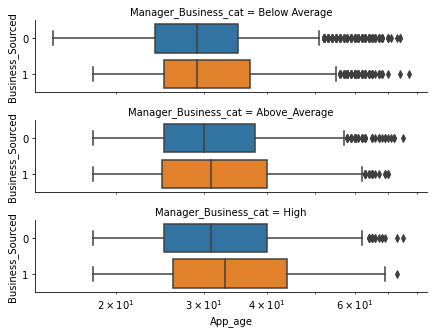

In [ ]:
g = sns.catplot(x="App_age", y="Business_Sourced", row="Manager_Business_cat",
                kind="box", orient="h", height=1.5, aspect=4,
                data=data)
g.set(xscale="log")

**How does Occupation affect business**

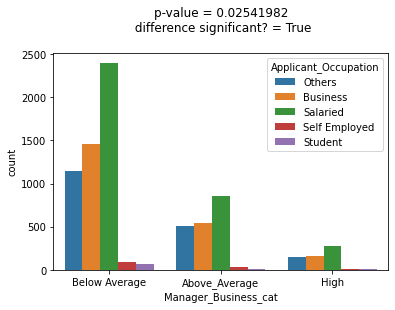

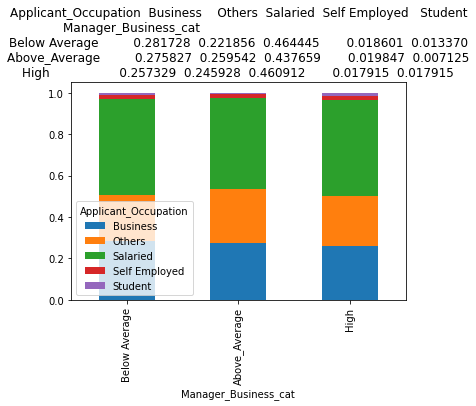

In [ ]:
#Is there a significant difference between the channels used by those who are target customers?
BVA_categorical_plot(data,'Applicant_Occupation', 'Manager_Business_cat')

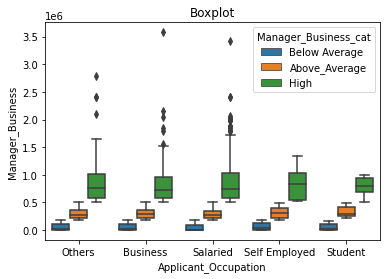

In [ ]:
Grouped_Box_Plot(data, 'Manager_Business', 'Applicant_Occupation', 'Manager_Business_cat')

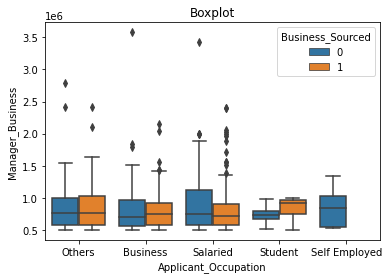

In [ ]:
Grouped_Box_Plot(h, 'Manager_Business', 'Applicant_Occupation', 'Business_Sourced')

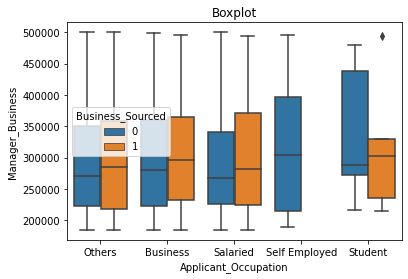

In [ ]:
Grouped_Box_Plot(aa, 'Manager_Business', 'Applicant_Occupation', 'Business_Sourced')

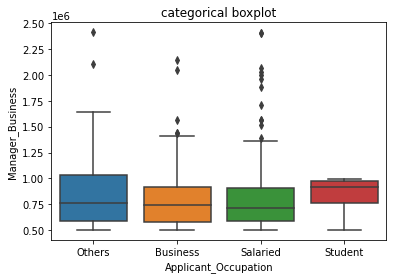

In [ ]:
sns.boxplot(x='Applicant_Occupation', y='Manager_Business', data=h[h['Business_Sourced']==1])
plt.title('categorical boxplot')
plt.show()

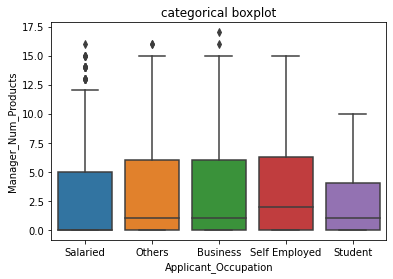

In [ ]:
sns.boxplot(x=ba['Applicant_Occupation'], y=ba['Manager_Num_Products'], data=ba[ba['Business_Sourced']==1])
plt.title('categorical boxplot')
plt.show()

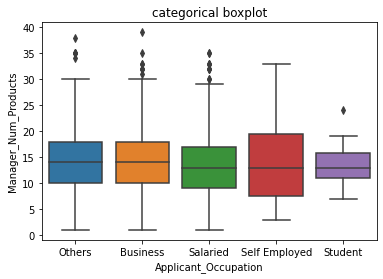

In [ ]:
sns.boxplot(x=aa['Applicant_Occupation'], y=aa['Manager_Num_Products'], data=aa[aa['Business_Sourced']==1])
plt.title('categorical boxplot')
plt.show()

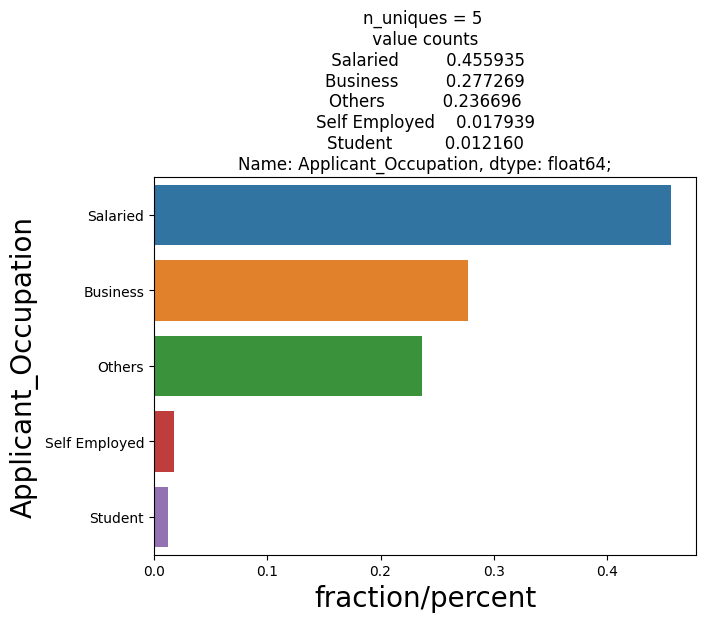

In [ ]:
UVA_category(data, ['Applicant_Occupation'])

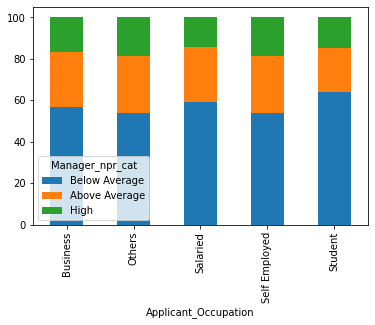

In [ ]:
o=pd.crosstab(index=dataqual['Applicant_Occupation'], columns=dataqual['Manager_npr_cat'], aggfunc='count', values=dataqual['ID'])
o_perc=o.apply(lambda r: (r/r.sum())*100, axis=1)
o_perc
o_perc.plot.bar(stacked=True)

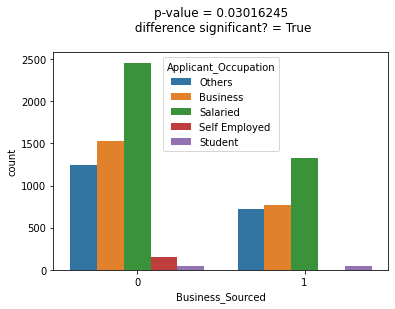

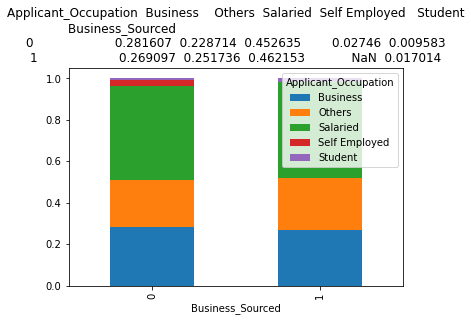

In [ ]:
#Is there any significant difference between the activity of the two genders?
BVA_categorical_plot(data,'Applicant_Occupation', 'Business_Sourced')



*   More than 45% of the agents are salaried.
*   But they continue  their performance is either average or below average
*   Salaried agents can only devout a limited number of hours for the job
*   Managers who have recruited more agents from Business/ Self Employed as occupation have sold more products and done more business
*   Hence salaried / Students should be given less preference if they cannot devout the right number of hours
*  Business has not been sourced considerably from Customers who have business or self employed as occupation. Managers with high performance have recruited more of self employed agents.
*   List item









## **EDUCATION**

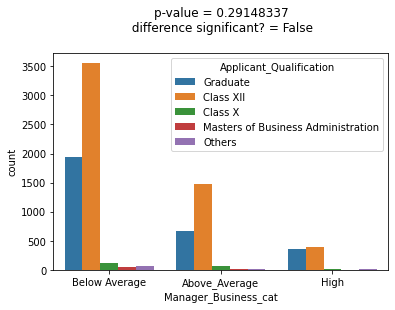

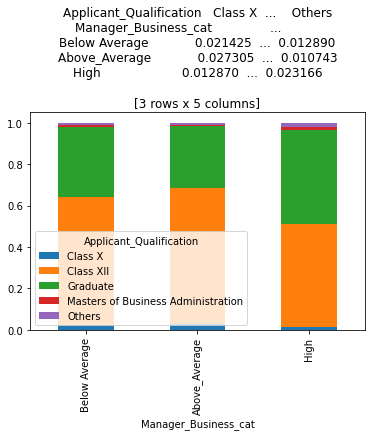

In [ ]:
BVA_categorical_plot(dataqual,'Applicant_Qualification', 'Manager_Business_cat')

In [ ]:
data['Applicant_Qualification']=data['Applicant_Qualification'].fillna(data['Applicant_Qualification'].mode())

Text(0, 0.5, 'No of Agents')

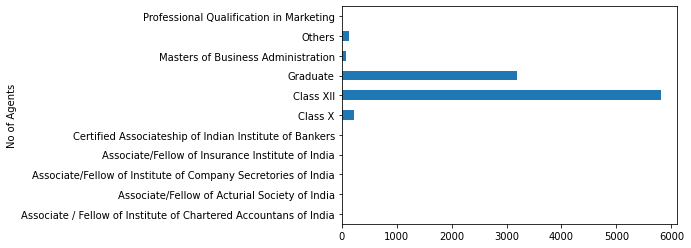

In [ ]:
m=data.groupby(['Applicant_Qualification']).count()['ID']
mt=m.plot(kind='barh')
mt.set_ylabel('No of Agents')

In [ ]:
g = sns.catplot(x="Manager_Num_Products", y="Business_Sourced", row="Applicant_Qualification",
                kind="box", orient="h", height=1.5, aspect=4,
                data=data)
g.set(xscale="log")

In [ ]:
dataqual=data[data['Applicant_Qualification'].isin(['Masters of Business Administration',  'Graduate', 'Class XII', 'Class X','Others'])]

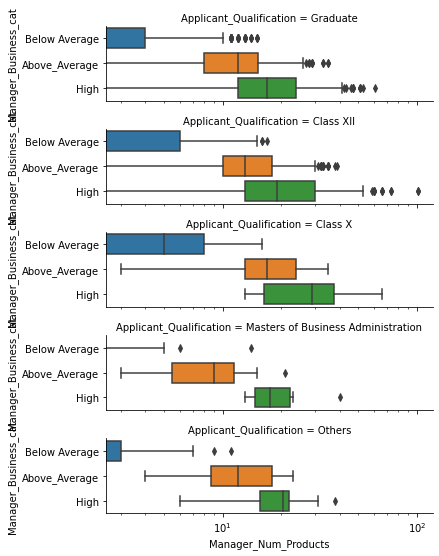

In [ ]:
g = sns.catplot(x="Manager_Num_Products", y="Manager_Business_cat", row="Applicant_Qualification",
                kind="box", orient="h", height=1.5, aspect=4,
                data=dataqual)
g.set(xscale="log")

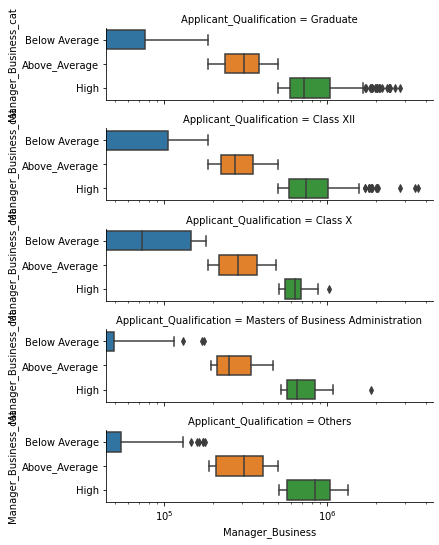

In [ ]:
g = sns.catplot(x="Manager_Business", y="Manager_Business_cat", row="Applicant_Qualification",
                kind="box", orient="h", height=1.5, aspect=4,
                data=dataqual)
g.set(xscale="log")

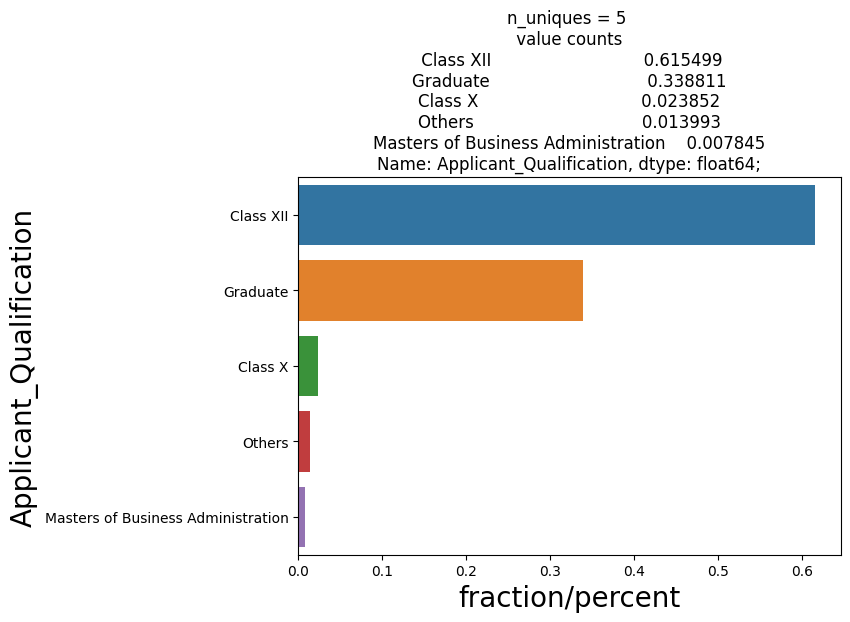

In [ ]:
UVA_category(dataqual, ['Applicant_Qualification'])

In [ ]:
data['Applicant_Qualification'].unique()



*   Managers who have done below average business. Have recruited more of class X and Class XII candidates, they have mainly recruited less qualified candidates
*   Managers with a high level of output in business have recruited more of MBA and Graduate agents.

*   Hence it is clearly evident that hiring graduates or MBA agents, increases the number of products sold and business done
*   Only one or two applicants are from Acturial/Banking/finance background. Luring more candidates from these backgrounds will redound the business





In [ ]:
fig3, ax = plt.subplots(figsize=(10, 25))
fig3.subplots_adjust(top=.965)
plt.suptitle('Relative absence distributed by neighborhood and waiting categories', fontsize=14, fontweight='bold')

cbar_kws = {'orientation':"horizontal", 'pad':0.08, 'aspect':50}
sns.heatmap(doq, annot=True, fmt='d', linewidths=.3, ax=ax, cmap='RdPu', cbar_kws=cbar_kws);

In [ ]:
doq=data.groupby(['Applicant_Qualification','Applicant_Occupation'], axis=0)['ID'].count()
doq=doq.add_suffix('_Count').reset_index()
doq

In [ ]:
a=pd.crosstab(index=dataqual['Applicant_Qualification'], columns=dataqual['Manager_Business_cat'], aggfunc='count', values=dataqual['ID'])
a.plot.bar(stacked=True)
plt.legend(title='Applicant Qualification')
plt.show()

In [ ]:
a_perc=a.apply(lambda r: (r/r.sum())*100, axis=1)
a_perc

Manager_Business_cat,Below Average,Above_Average,High
Applicant_Qualification,,,
Class X,63.402062,31.443299,5.154639
Class XII,65.700037,27.151829,7.148134
Graduate,65.573216,22.455191,11.971593
Masters of Business Administration,67.605634,21.126761,11.267606
Others,63.793103,20.689655,15.517241


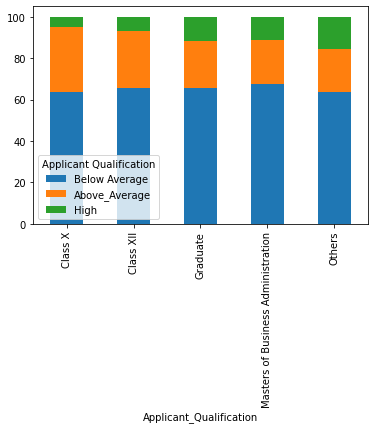

In [ ]:
a_perc.plot.bar(stacked=True)
plt.legend(title='Applicant Qualification')
plt.show()

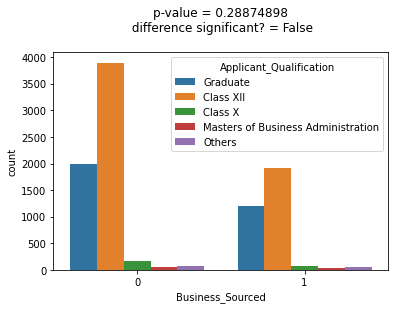

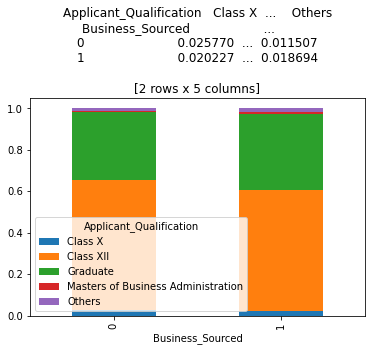

In [ ]:
#Is there any significant difference between the activity of the two genders?
BVA_categorical_plot(dataqual,'Applicant_Qualification', 'Business_Sourced')

**How does marital status impact performance?**

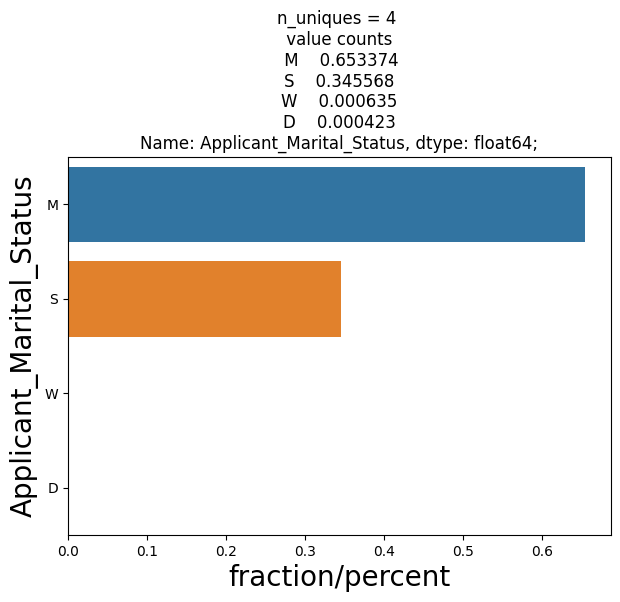

In [ ]:
UVA_category(data, ['Applicant_Marital_Status'])


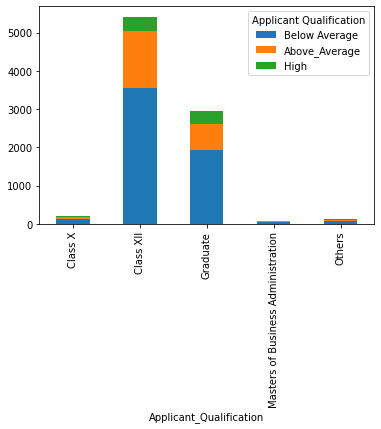

In [ ]:
a=pd.crosstab(index=dataqual['Applicant_Qualification'], columns=dataqual['Manager_Business_cat'], aggfunc='count', values=dataqual['ID'])
a.plot.bar(stacked=True)
plt.legend(title='Applicant Qualification')
plt.show()

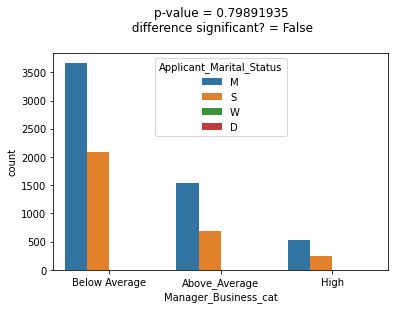

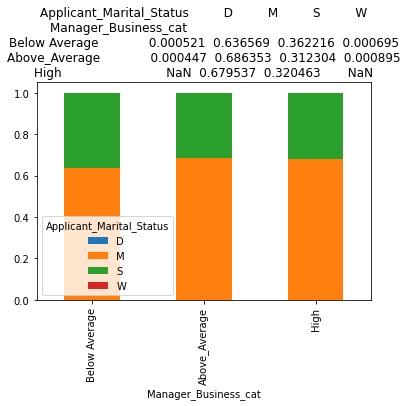

In [ ]:
#Does marital status of applicants affect their performance?
BVA_categorical_plot(data,'Applicant_Marital_Status', 'Manager_Business_cat')

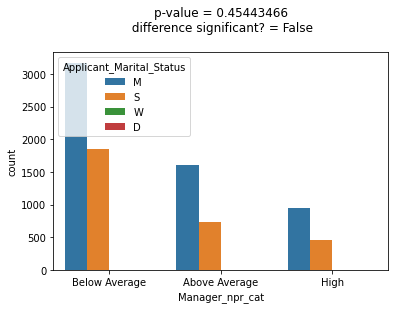

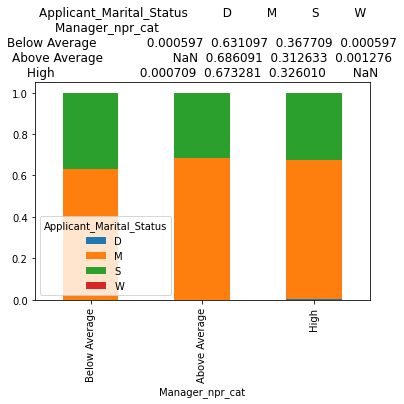

In [ ]:
#Is there any significant difference between the activity of the two genders?
BVA_categorical_plot(data,'Applicant_Marital_Status', 'Manager_npr_cat')

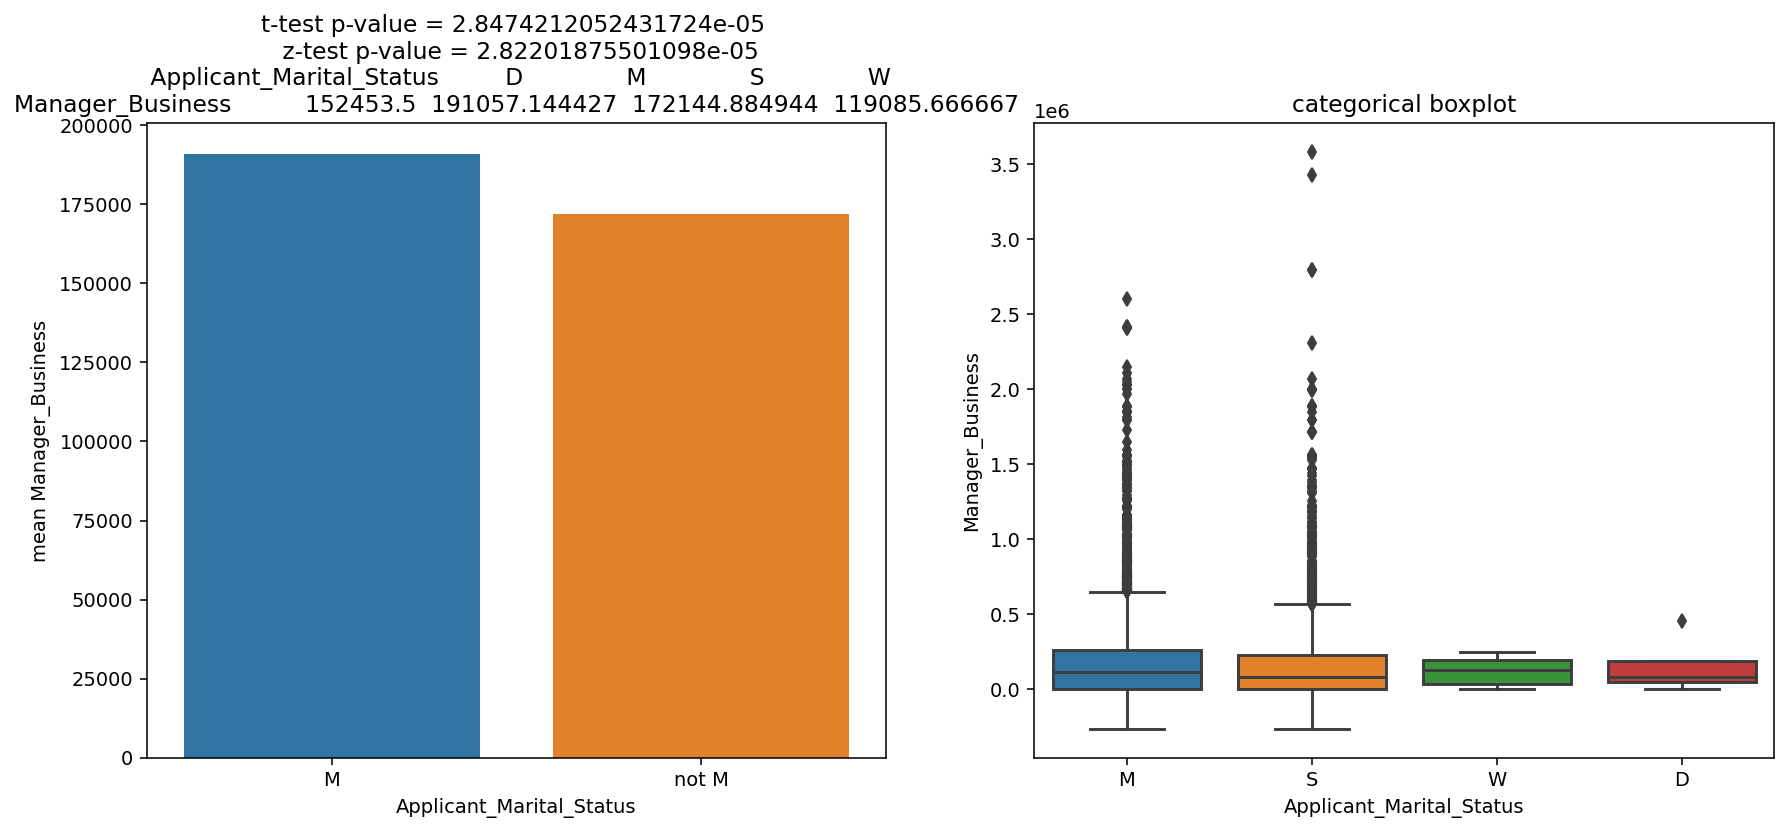

In [ ]:
#Are self employed customers more likely to be old customers?
Bivariate_cont_cat(data, 'Manager_Business', 'Applicant_Marital_Status', 'M')

In [ ]:
data['Applicant_Marital_Status'].unique()

array(['M', 'S', nan, 'W', 'D'], dtype=object)

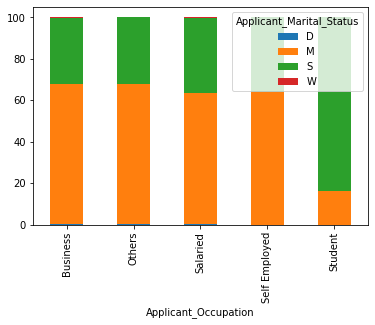

In [ ]:
m=pd.crosstab(index=dataqual['Applicant_'], columns=dataqual['Applicant_Marital_Status'], aggfunc='count', values=dataqual['ID'])
m_perc=m.apply(lambda r: (r/r.sum())*100, axis=1)
m_perc
m_perc.plot.bar(stacked=True)

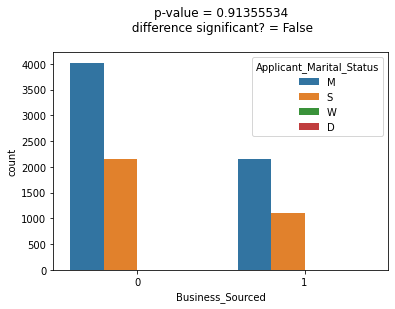

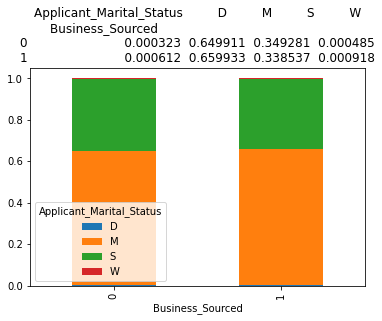

In [ ]:
#Is there any significant difference between business sourced on the basis of marital status?
BVA_categorical_plot(data,'Applicant_Marital_Status', 'Business_Sourced')

Applicant_Marital_Status,D,M,S,W
Applicant_Qualification,,,,
Class X,NaN,77.333333,22.666667,NaN
Class XII,0.034453,63.531438,36.382429,0.051680
Graduate,0.062696,68.025078,31.849530,0.062696
Masters of Business Administration,NaN,59.459459,39.189189,1.351351
Others,NaN,65.151515,34.848485,NaN


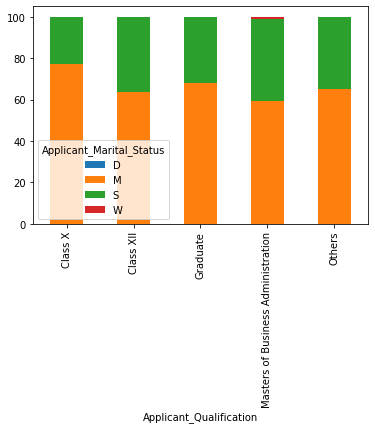

In [ ]:
m=pd.crosstab(index=dataqual['Applicant_Qualification'], columns=dataqual['Applicant_Marital_Status'], aggfunc='count', values=dataqual['ID'])
m_perc=m.apply(lambda r: (r/r.sum())*100, axis=1)
m_perc
m_perc.plot.bar(stacked=True)
m_perc



*   We fail to reject the null hypothesis, the difference is not statistically significant
*   Majority of the agents recruited by Finman are married. How ever Managers who are selling than average number of products and not doing really well in business have recruited a larger propoetion of single agents.


*   Most of the unmarried agents are highly likely to be students/salaried hence the poor performance.






## **How does gender impact the business?**

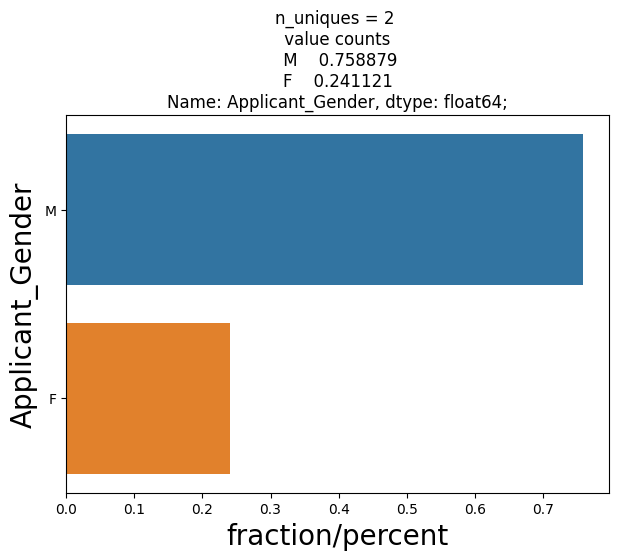

In [ ]:
#Univariate Analysis of gender diversity
UVA_category(data, ['Applicant_Gender'])


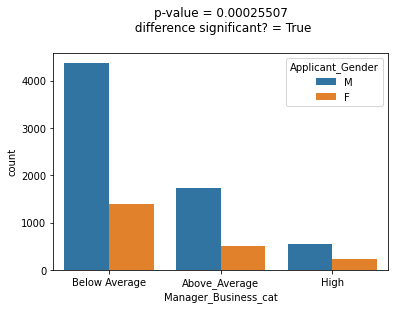

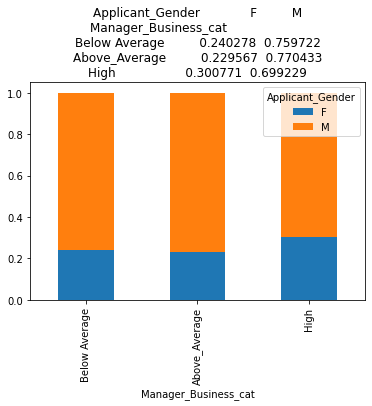

In [ ]:
#Is there any significant difference between the activity of the two genders?
BVA_categorical_plot(data,'Applicant_Gender', 'Manager_Business_cat')



*   
*   List item





In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Violin(x=data['Manager_Business_cat'][ data['Applicant_Gender'] == 'M' ],
                        y=data['Manager_Num_Products'][ data['Applicant_Gender'] == 'M' ],
                        legendgroup='M', scalegroup='M', name='M',
                        line_color='blue')
             )
fig.add_trace(go.Violin(x=data['Manager_Business_cat'][ data['Applicant_Gender'] == 'F' ],
                        y=data['Manager_Num_Products'][ data['Applicant_Gender'] == 'F' ],
                        legendgroup='F', scalegroup='F', name='F',
                        line_color='orange')
             )

fig.update_traces(box_visible=True, meanline_visible=True)
fig.update_layout(violinmode='group')
fig.show()

Applicant_Gender,F,M
Manager_Business_cat,,
Below Average,24.055043,75.944957
Above_Average,22.963295,77.036705
High,30.154639,69.845361


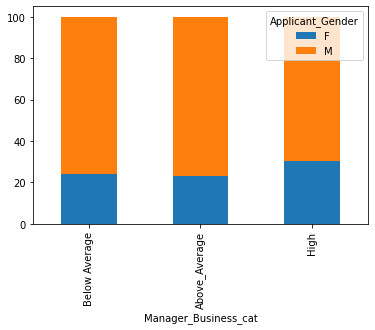

In [ ]:
g=pd.crosstab(index=dataqual['Manager_Business_cat'], columns=dataqual['Applicant_Gender'], aggfunc='count', values=dataqual['ID'])
g_perc=g.apply(lambda r: (r/r.sum())*100, axis=1)
g_perc
g_perc.plot.bar(stacked=True)
g_perc

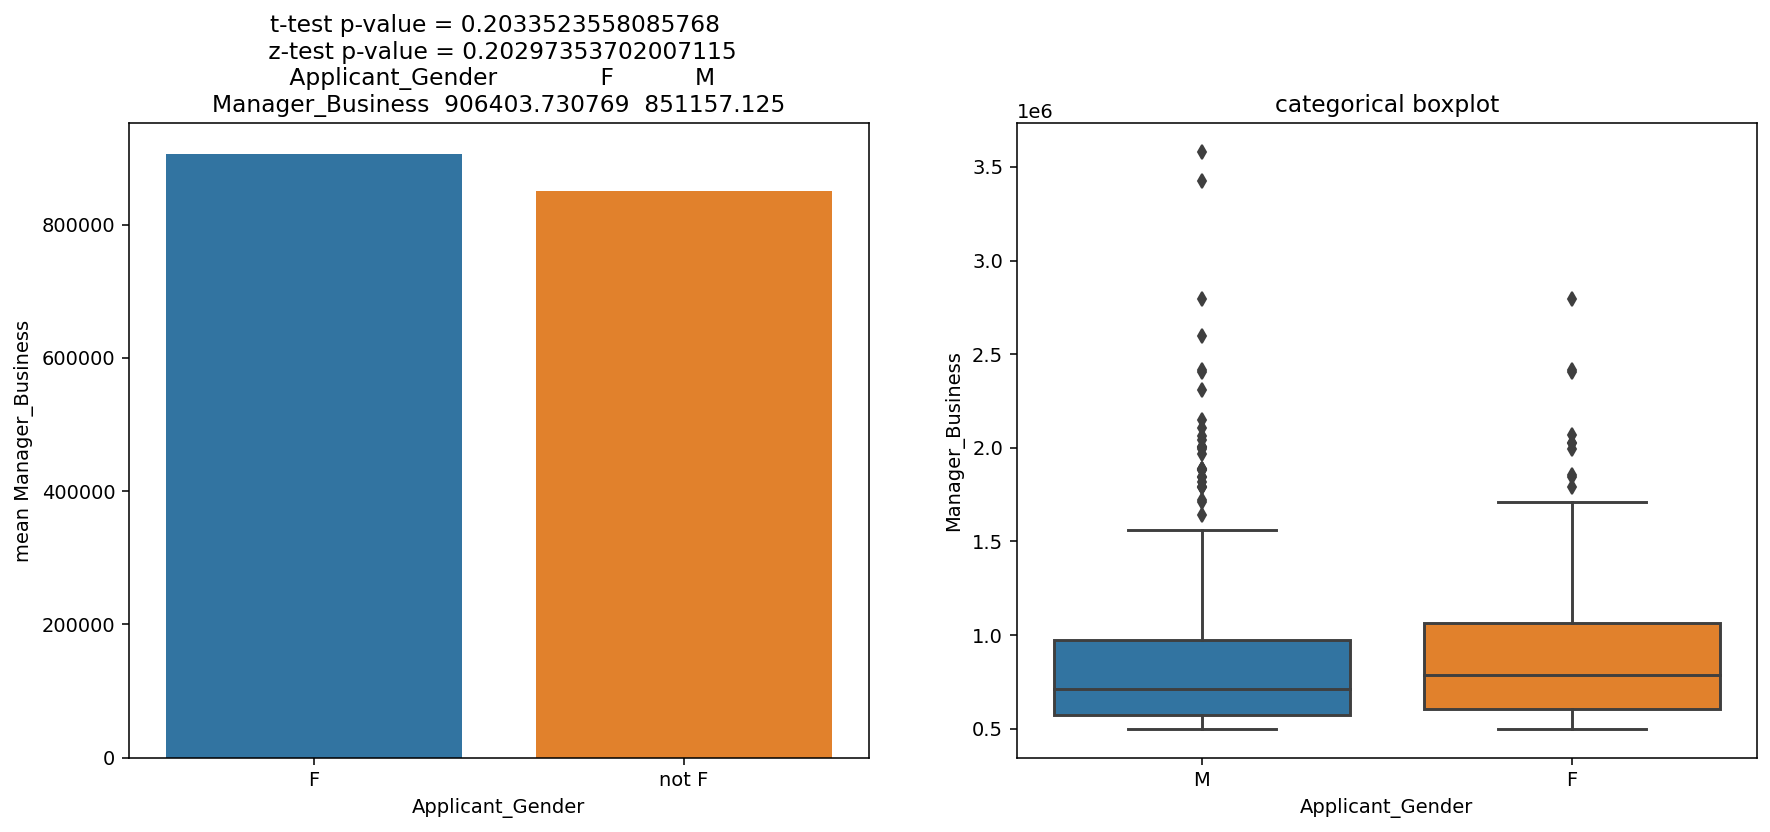

In [ ]:
#Are managers recruiting more female agents bringing in more business?
Bivariate_cont_cat(h, 'Manager_Business', 'Applicant_Gender', 'F')

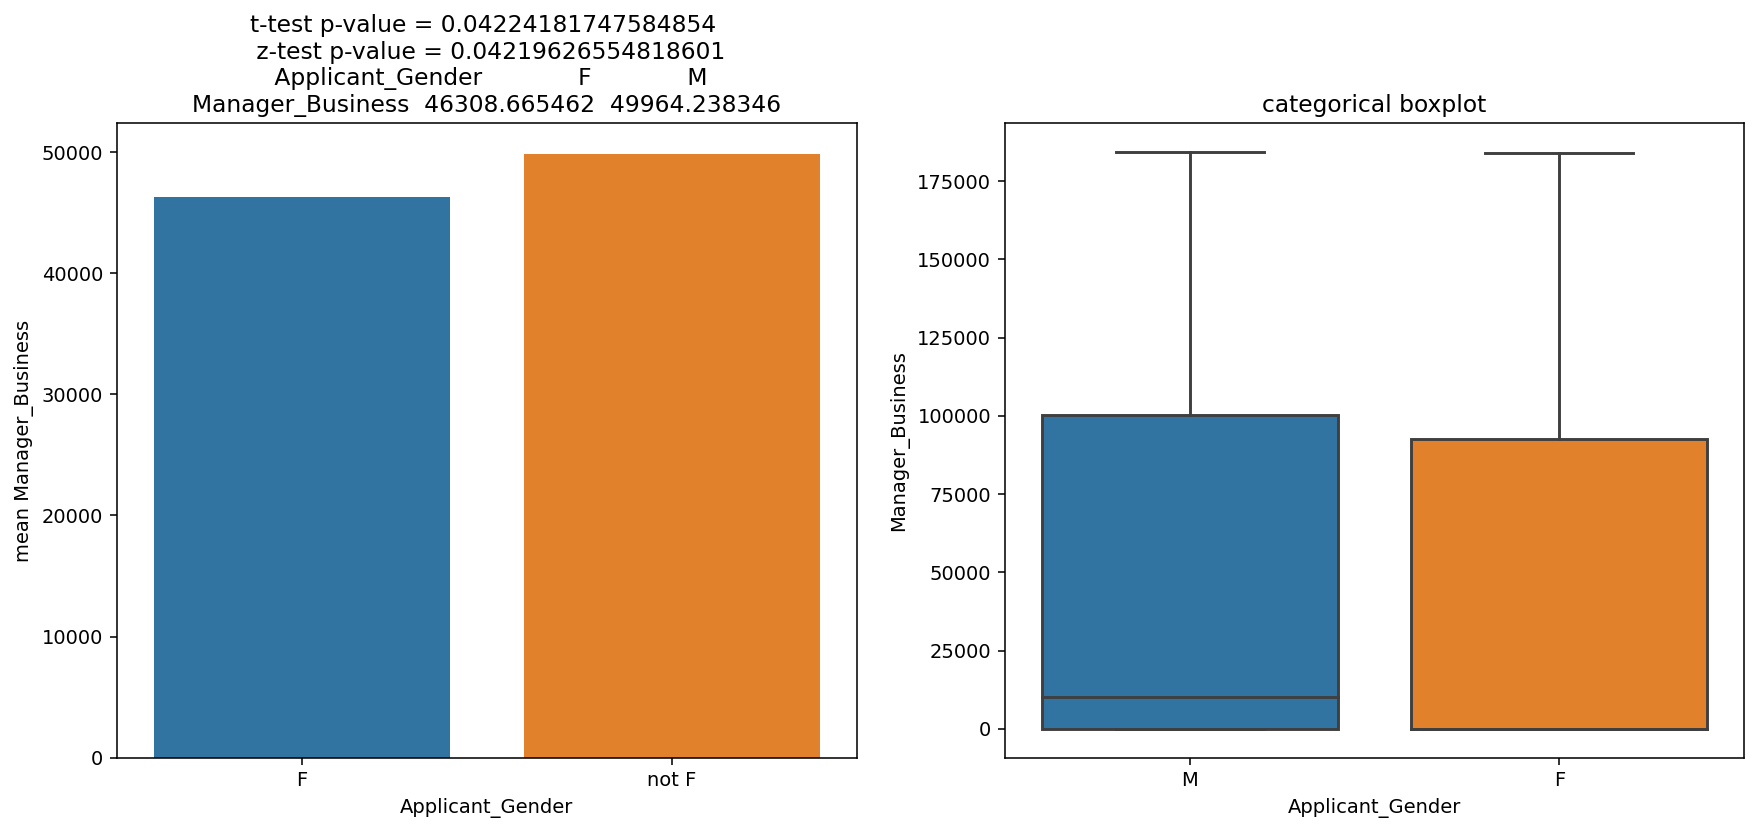

In [ ]:
#Are managers recruiting more female agents bringing in more business?
Bivariate_cont_cat(ba, 'Manager_Business', 'Applicant_Gender', 'F')



*   The number of female applicants is significantly low
*   Managers with below average business have a significant difference between the proportion of male and female candidates.
*   From the above comparision it is evident in high performing managers, have recruited more Females are performing better than their counterparts.






Applicant_Qualification,Class X,Class XII,Graduate,Masters of Business Administration,Others
Manager_Business_cat,,,,,
Below Average,1.303403,58.001448,38.305576,0.724113,1.665460
Above_Average,0.389864,62.378168,36.257310,0.194932,0.779727
High,0.854701,48.717949,46.153846,1.282051,2.991453


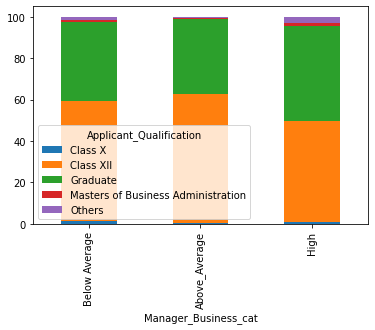

In [ ]:
f=dataqual[dataqual['Applicant_Gender']=='F']
g=pd.crosstab(index=f['Manager_Business_cat'], columns=dataqual['Applicant_Qualification'], aggfunc='count', values=dataqual['ID'])
g_perc=g.apply(lambda r: (r/r.sum())*100, axis=1)
g_perc
g_perc.plot.bar(stacked=True)
g_perc

In [ ]:
data['Manager_Exp']=(mmdc-data['Manager_DOJ'])/np.timedelta64(1,'Y')

In [ ]:
data['Manager_DOJ']=pd.to_datetime(data['Manager_DOJ'])

In [ ]:
data['Manager_Exp']=data['Manager_Exp'].fillna(data['Manager_Exp'].mean())

In [ ]:
data['Manager_Exp']=data['Manager_Exp'].astype('int')

In [ ]:
data['Manager_Business'].corr(data['Manager_Exp'])

0.40079832435797413

In [ ]:
mm=data.groupby('manager_uid')['Manager_Exp', 'Manager_Business'].mean()
mm.reset_index()

,manager_uid,Manager_Exp,Manager_Business
0,1949-07-121.02.0,2.0,186207.666667
1,1949-07-123.02.0,2.0,95360.000000
2,1953-07-030.03.0,2.0,153393.000000
3,1953-07-031.03.0,2.0,520778.333333
4,1953-07-032.03.0,2.0,515183.250000
...,...,...,...
2655,1986-06-282.02.0,0.0,69404.000000
2656,1986-06-283.02.0,0.0,19404.000000
2657,1986-07-090.02.0,1.0,21669.000000
2658,1986-07-092.02.0,1.0,34800.000000


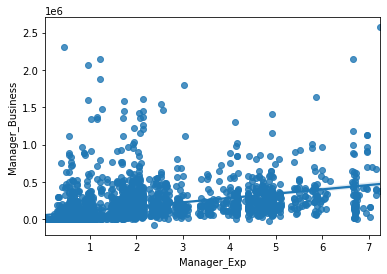

In [ ]:
sns.regplot(data=mm, y="Manager_Business", x="Manager_Exp")

In [ ]:
data[data['Business_Sourced']==1].count()

ID                             3267
Office_PIN                     3267
Application_Receipt_Date       3267
Applicant_City_PIN             3251
Applicant_Gender               3267
Applicant_BirthDate            3267
Applicant_Marital_Status       3267
Applicant_Occupation           2880
Applicant_Qualification        3267
Manager_DOJ                    3031
Manager_Joining_Designation    3031
Manager_Current_Designation    3031
Manager_Grade                  3031
Manager_Status                 3031
Manager_Gender                 3031
Manager_DoB                    3031
Manager_Num_Application        3031
Manager_Num_Coded              3031
Manager_Business               3031
Manager_Num_Products           3031
Manager_Business2              3031
Manager_Num_Products2          3031
Business_Sourced               3267
manager_exp                    3031
manager_age                    3031
manager_uid                    3267
Manager_Business_cat           3029
Manager_npr_cat             

In [ ]:
data['ID'].count()

9527

Business_Sourced,False,True
Manager_Business_cat,,
Below Average,66.540121,33.459879
Above_Average,65.896980,34.103020
High,58.876117,41.123883


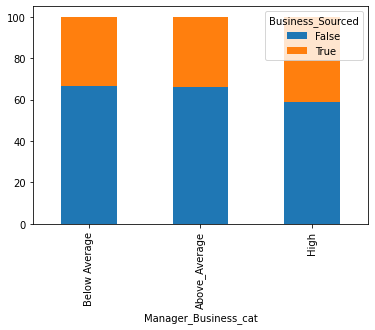

In [ ]:

g=pd.crosstab(index=data['Manager_Business_cat'], columns=data['Business_Sourced']==1, aggfunc='count', values=data['ID'])
g_perc=g.apply(lambda r: (r/r.sum())*100, axis=1)
g_perc
g_perc.plot.bar(stacked=True)
g_perc

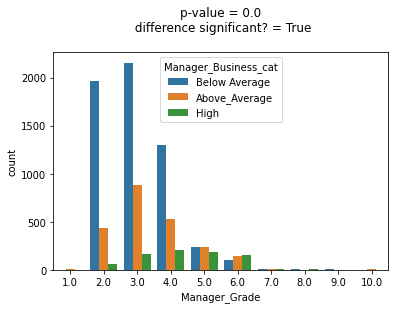

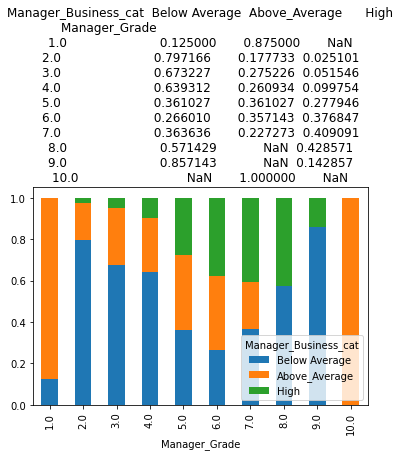

In [ ]:
#Is there any significant difference between the activity of the two genders?
BVA_categorical_plot(data,'Manager_Business_cat', 'Manager_Grade')

In [ ]:
hg=data[data['Manager_Grade'].isin([1.0,10.0])]
hg.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,manager_exp,manager_age,manager_uid,Manager_Business_cat,Manager_npr_cat,App_age,Manager_age,Manager_Exp
146,FIN1000147,812001,2007-04-18,813109.0,M,1982-04-05,S,Business,Class XII,2006-11-16,Level 1,Level 1,1.0,Confirmation,M,1959-01-03,0.0,3.0,141863.0,13.0,141863.0,13.0,0,593 days,18077 days,1959-01-033.01.0,Below Average,Above Average,25,49,1
331,FIN1000332,334002,2007-04-23,334001.0,F,1989-04-20,M,Self Employed,Class XII,2006-08-07,Level 1,Level 1,1.0,Confirmation,M,1984-05-12,6.0,3.0,243722.0,9.0,243722.0,9.0,0,694 days,8816 days,1984-05-123.01.0,Above_Average,Above Average,18,24,1
912,FIN1000913,422005,2007-05-08,422001.0,M,1975-11-18,M,Self Employed,Graduate,2006-08-04,Level 1,Level 1,1.0,Confirmation,F,1978-11-30,0.0,1.0,209050.0,6.0,209050.0,6.0,0,697 days,10806 days,1978-11-301.01.0,Above_Average,Below Average,31,29,1
1273,FIN1001274,122002,2007-05-14,123021.0,F,1973-02-06,M,Others,Class XII,2006-10-06,Level 1,Level 1,1.0,Confirmation,M,1966-08-04,0.0,1.0,248939.0,15.0,248939.0,15.0,0,634 days,15307 days,1966-08-041.01.0,Above_Average,High,34,41,1
1480,FIN1001481,575003,2007-05-22,574313.0,M,1960-06-24,M,Others,Class X,2006-09-23,Level 1,Level 1,1.0,Confirmation,M,1959-03-24,0.0,1.0,211544.0,7.0,211544.0,7.0,0,647 days,17997 days,1959-03-241.01.0,Above_Average,Above Average,46,49,1


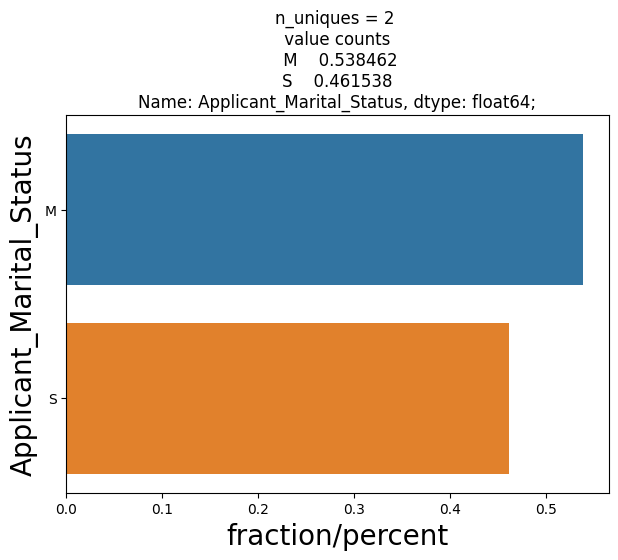

In [ ]:

UVA_category(hg, ['Applicant_Marital_Status'])

In [ ]:
lg=data[data['Manager_Grade'].isin([2.0,3.0, 4.0 ,9.0])]
lg.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,manager_exp,manager_age,manager_uid,Manager_Business_cat,Manager_npr_cat,App_age,Manager_age,Manager_Exp
0,FIN1000001,842001,2007-04-16,844120.0,M,1971-12-19,M,Others,Graduate,2005-11-10,Level 1,Level 2,3.0,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,0,964 days,11092 days,1978-02-171.03.0,Above_Average,High,35,30,2
1,FIN1000002,842001,2007-04-16,844111.0,M,1983-02-17,S,Others,Class XII,2005-11-10,Level 1,Level 2,3.0,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,1,964 days,11092 days,1978-02-171.03.0,Above_Average,High,24,30,2
2,FIN1000003,800001,2007-04-16,844101.0,M,1966-01-16,M,Business,Class XII,2006-05-27,Level 1,Level 1,2.0,Confirmation,M,1969-03-03,0.0,0.0,357184.0,24.0,357184.0,24.0,0,766 days,14365 days,1969-03-030.02.0,Above_Average,High,41,39,2
3,FIN1000004,814112,2007-04-16,814112.0,M,1988-02-03,S,Salaried,Class XII,2003-08-21,Level 1,Level 3,4.0,Confirmation,F,1978-08-14,0.0,0.0,318356.0,22.0,318356.0,22.0,0,1776 days,10914 days,1978-08-140.04.0,Above_Average,High,19,29,4
4,FIN1000005,814112,2007-04-16,815351.0,M,1985-07-04,M,Others,Class XII,2006-05-08,Level 1,Level 1,2.0,Confirmation,M,1971-02-07,2.0,1.0,230402.0,17.0,230402.0,17.0,0,785 days,13659 days,1971-02-071.02.0,Above_Average,High,21,37,2


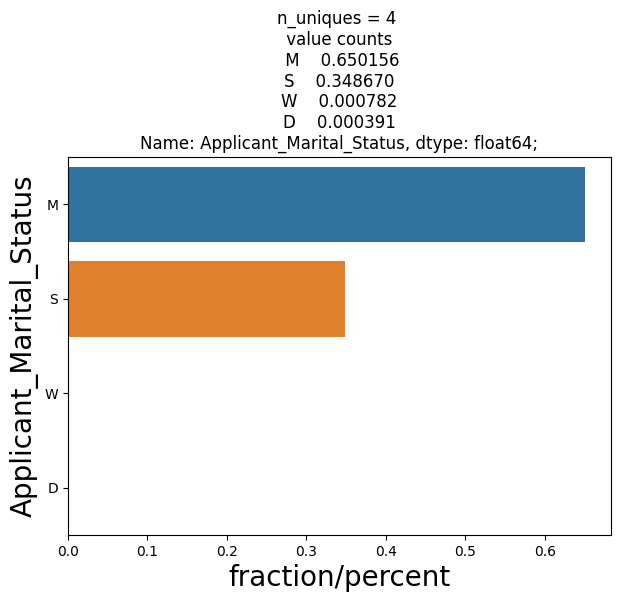

In [ ]:
UVA_category(lg, ['Applicant_Marital_Status'])

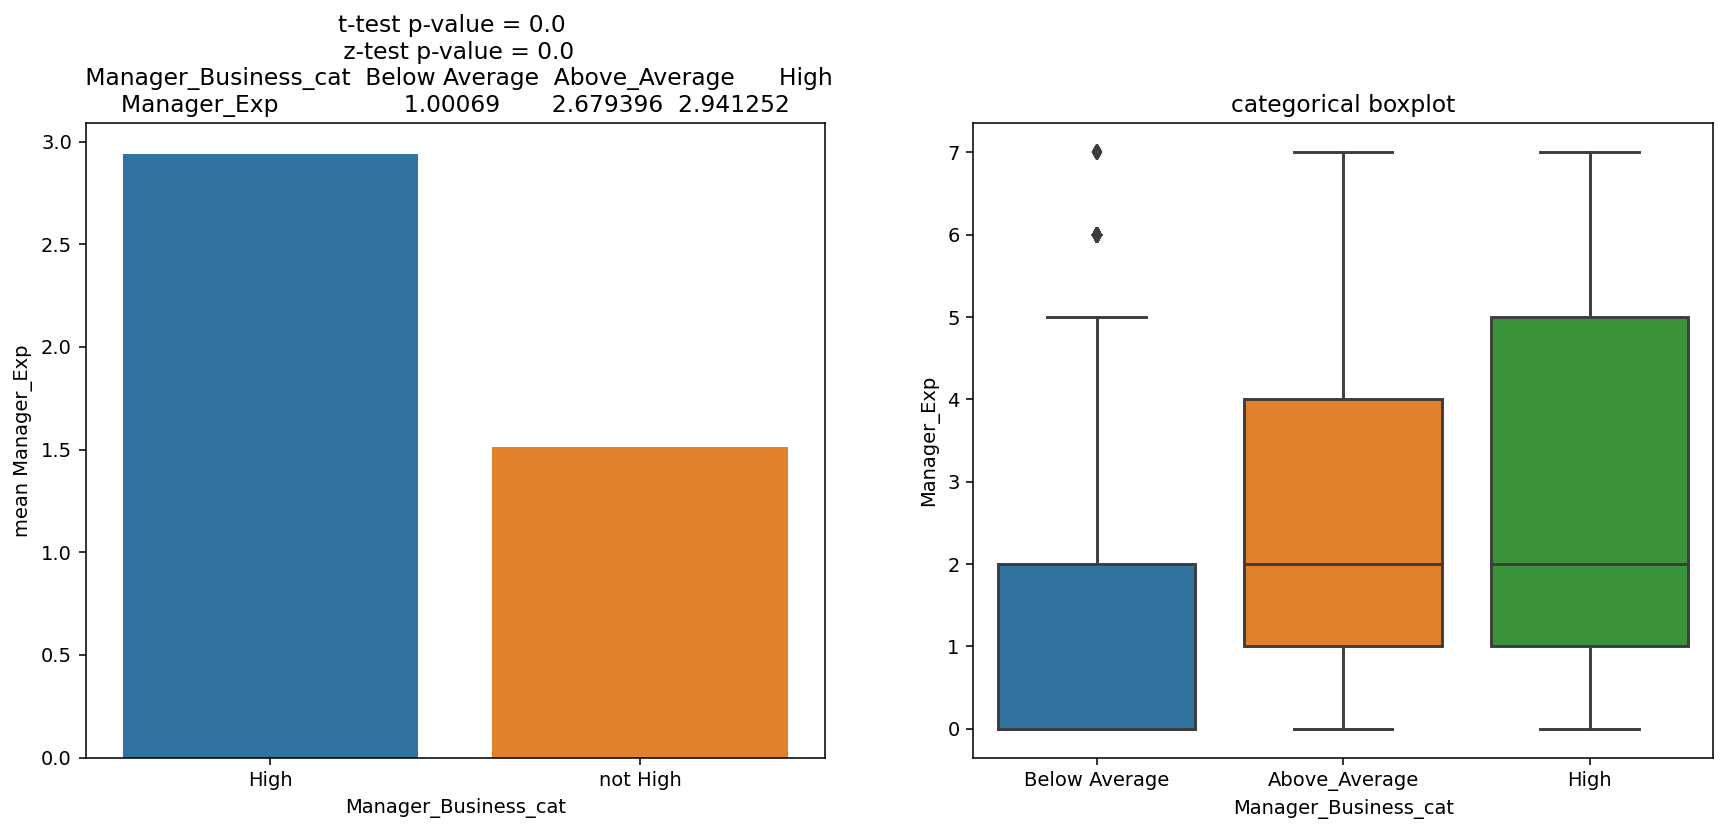

In [ ]:

Bivariate_cont_cat(data, 'Manager_Exp', 'Manager_Business_cat', 'High')

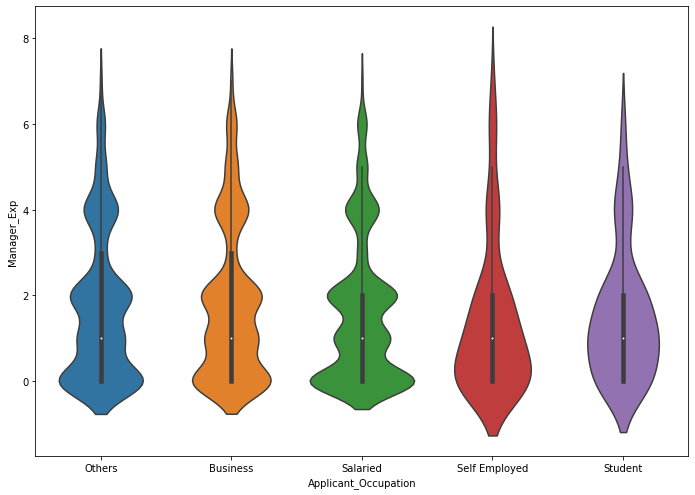

In [ ]:
a4_dims=(11.7,8.27)
fig, ax= plt.subplots(figsize=a4_dims)
sns.violinplot(x="Applicant_Occupation", y="Manager_Exp", data=dataqual, ax=ax)


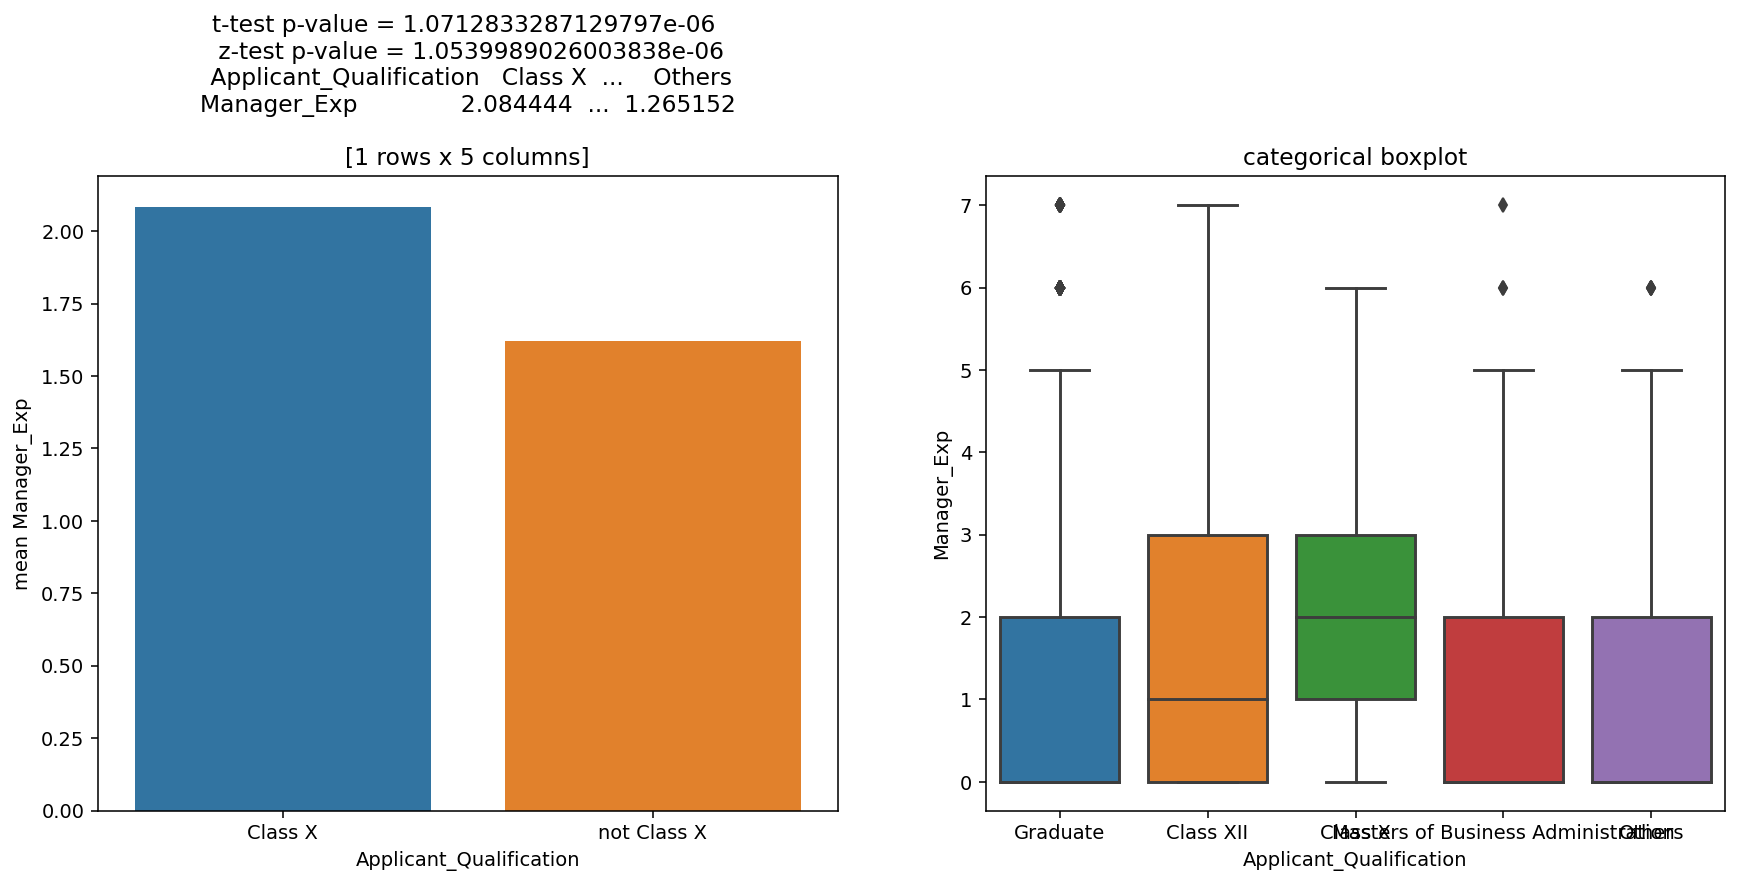

In [ ]:
Bivariate_cont_cat(dataqual, 'Manager_Exp', 'Applicant_Qualification', 'Class X')

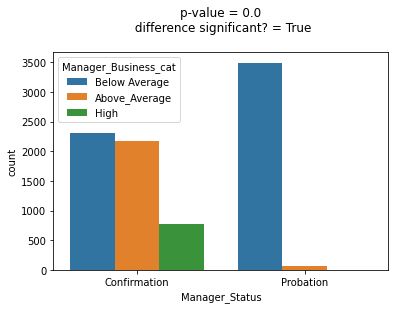

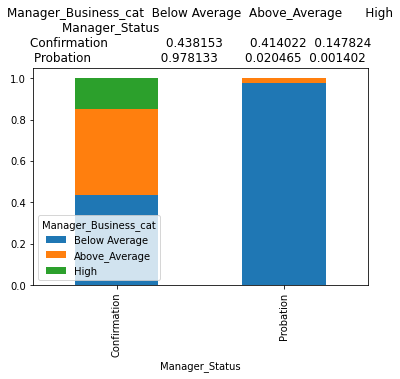

In [ ]:

BVA_categorical_plot(data,'Manager_Business_cat', 'Manager_Status')

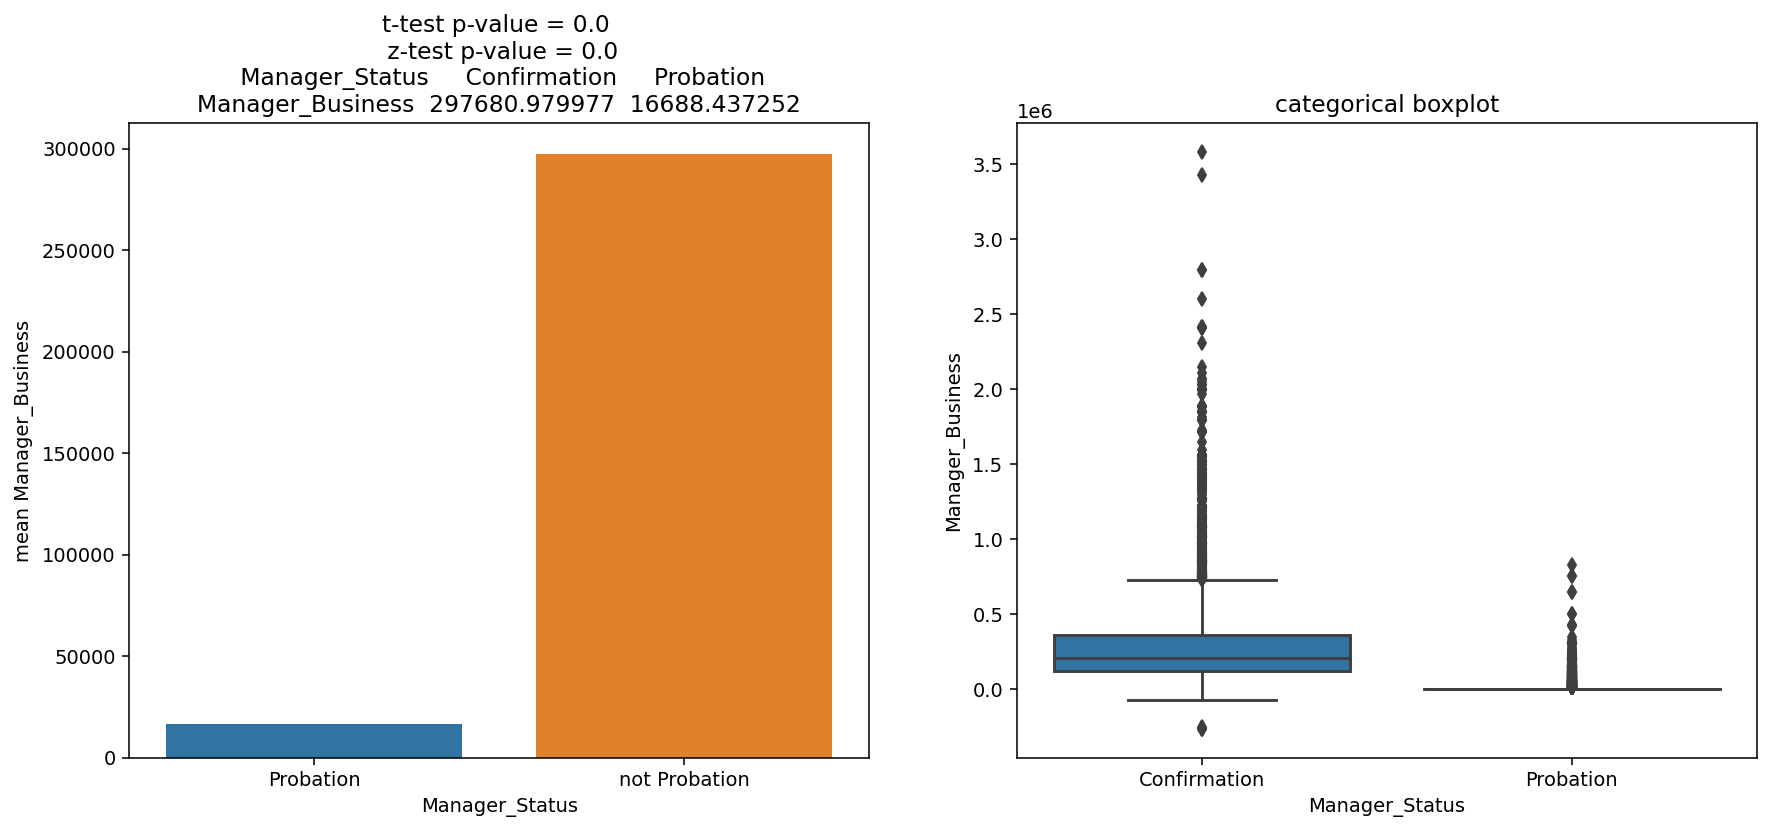

In [ ]:
Bivariate_cont_cat(dataqual, 'Manager_Business', 'Manager_Status', 'Probation')

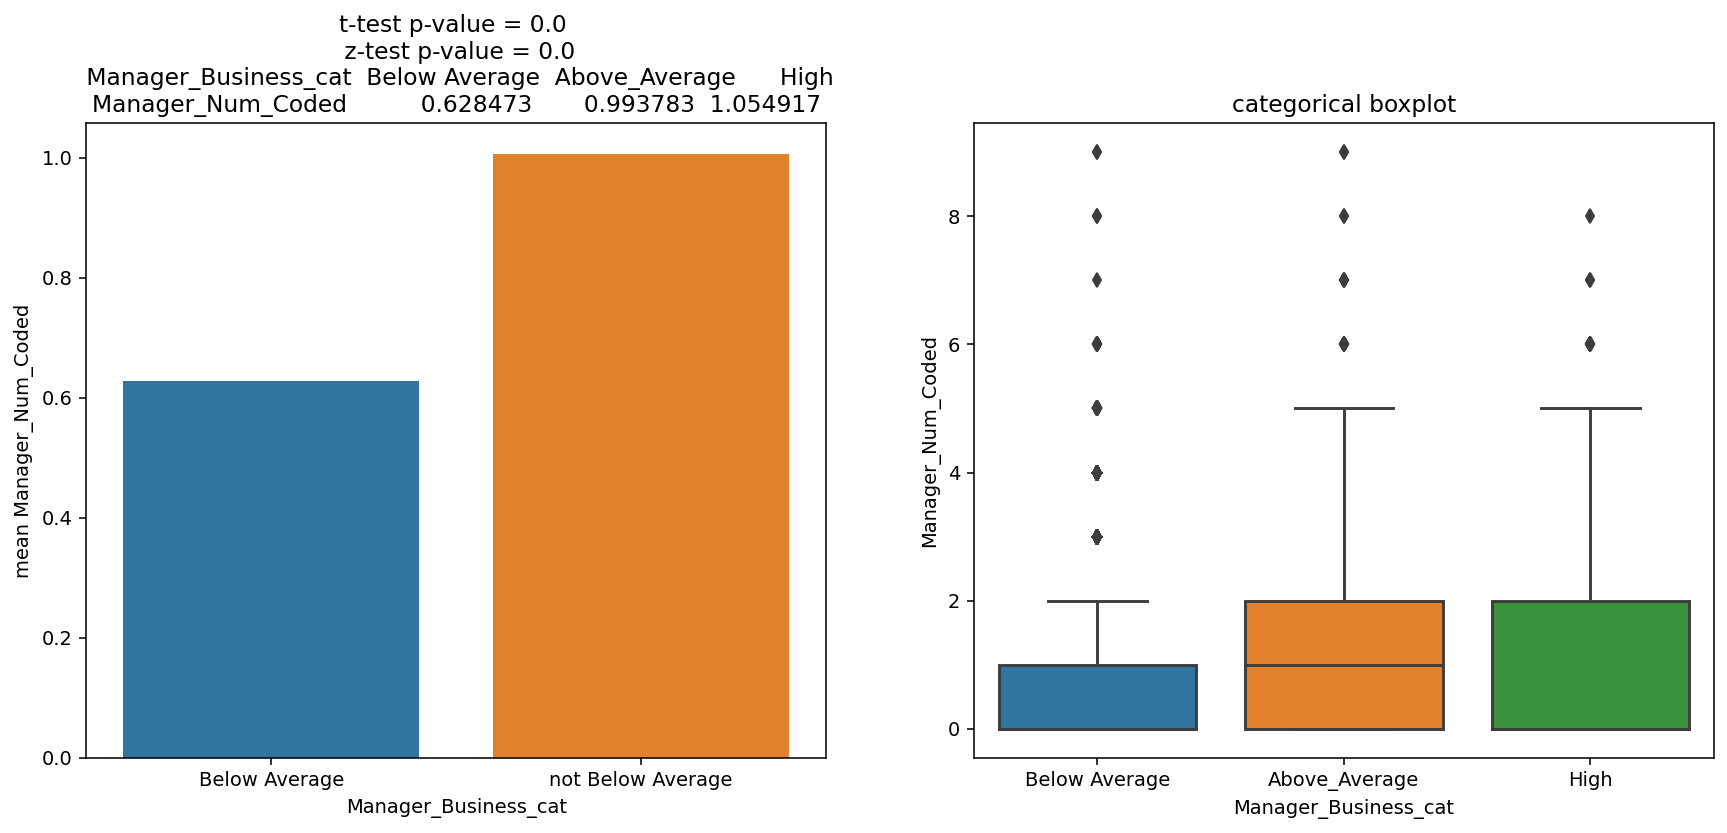

In [ ]:
Bivariate_cont_cat(data, 'Manager_Num_Coded', 'Manager_Business_cat', 'Below Average')

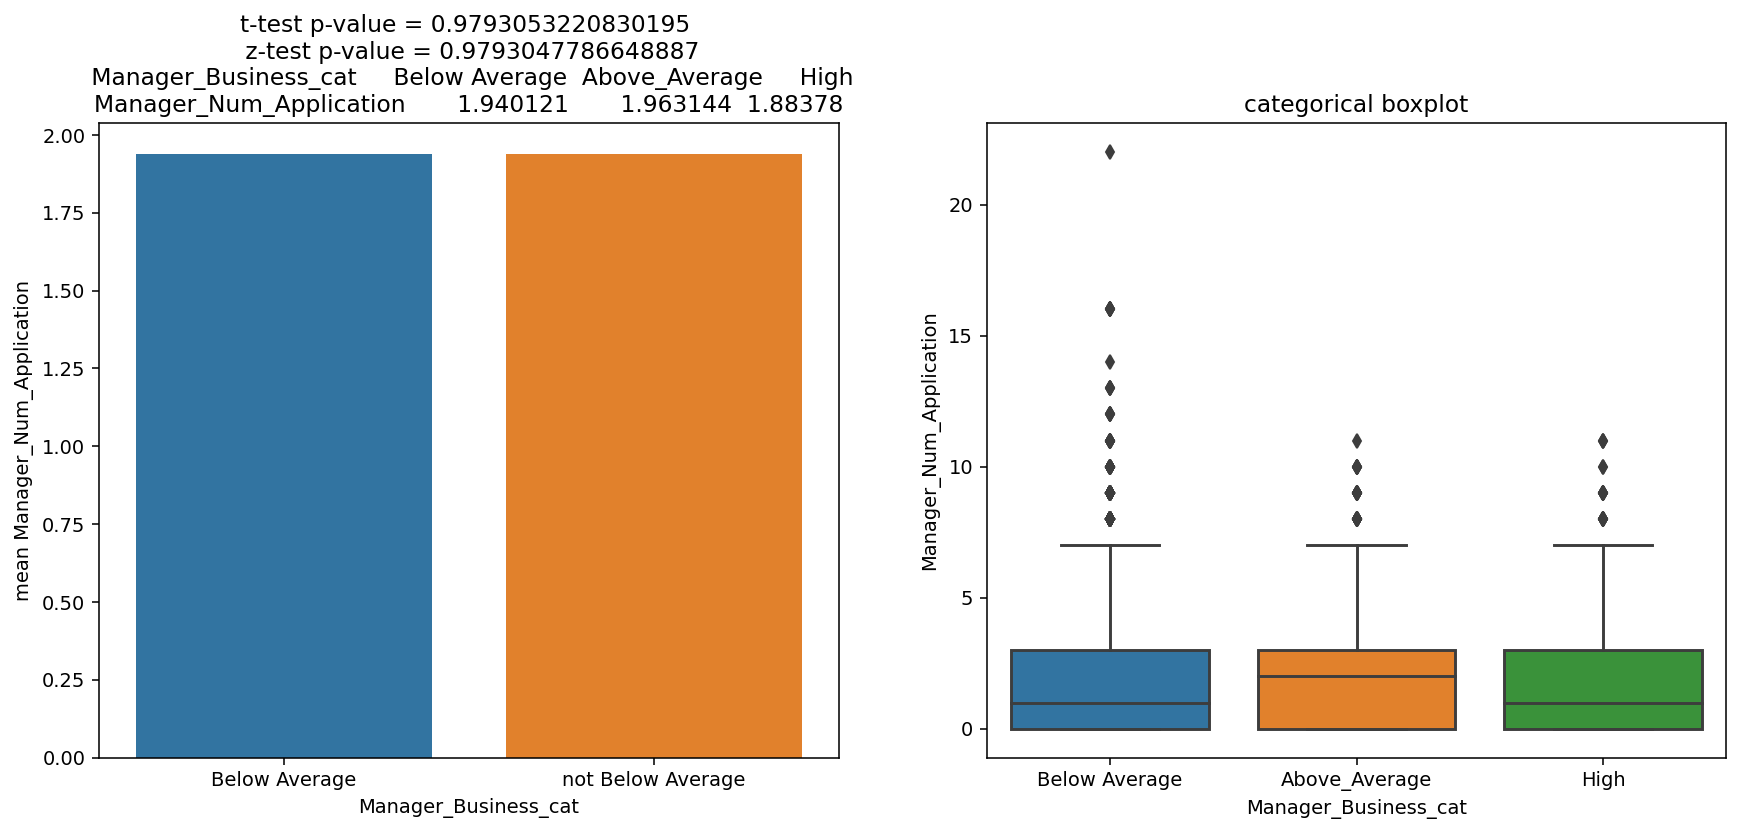

In [ ]:
Bivariate_cont_cat(data, 'Manager_Num_Application', 'Manager_Business_cat', 'Below Average')

In [ ]:
data.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,manager_exp,manager_age,manager_uid,Manager_Business_cat,Manager_npr_cat,App_age,Manager_age,Manager_Exp
0,FIN1000001,842001,2007-04-16,844120.0,M,1971-12-19,M,Others,Graduate,2005-11-10,Level 1,Level 2,3.0,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,0,964 days,11092 days,1978-02-171.03.0,Above_Average,High,35,30,2
1,FIN1000002,842001,2007-04-16,844111.0,M,1983-02-17,S,Others,Class XII,2005-11-10,Level 1,Level 2,3.0,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,1,964 days,11092 days,1978-02-171.03.0,Above_Average,High,24,30,2
2,FIN1000003,800001,2007-04-16,844101.0,M,1966-01-16,M,Business,Class XII,2006-05-27,Level 1,Level 1,2.0,Confirmation,M,1969-03-03,0.0,0.0,357184.0,24.0,357184.0,24.0,0,766 days,14365 days,1969-03-030.02.0,Above_Average,High,41,39,2
3,FIN1000004,814112,2007-04-16,814112.0,M,1988-02-03,S,Salaried,Class XII,2003-08-21,Level 1,Level 3,4.0,Confirmation,F,1978-08-14,0.0,0.0,318356.0,22.0,318356.0,22.0,0,1776 days,10914 days,1978-08-140.04.0,Above_Average,High,19,29,4
4,FIN1000005,814112,2007-04-16,815351.0,M,1985-07-04,M,Others,Class XII,2006-05-08,Level 1,Level 1,2.0,Confirmation,M,1971-02-07,2.0,1.0,230402.0,17.0,230402.0,17.0,0,785 days,13659 days,1971-02-071.02.0,Above_Average,High,21,37,2


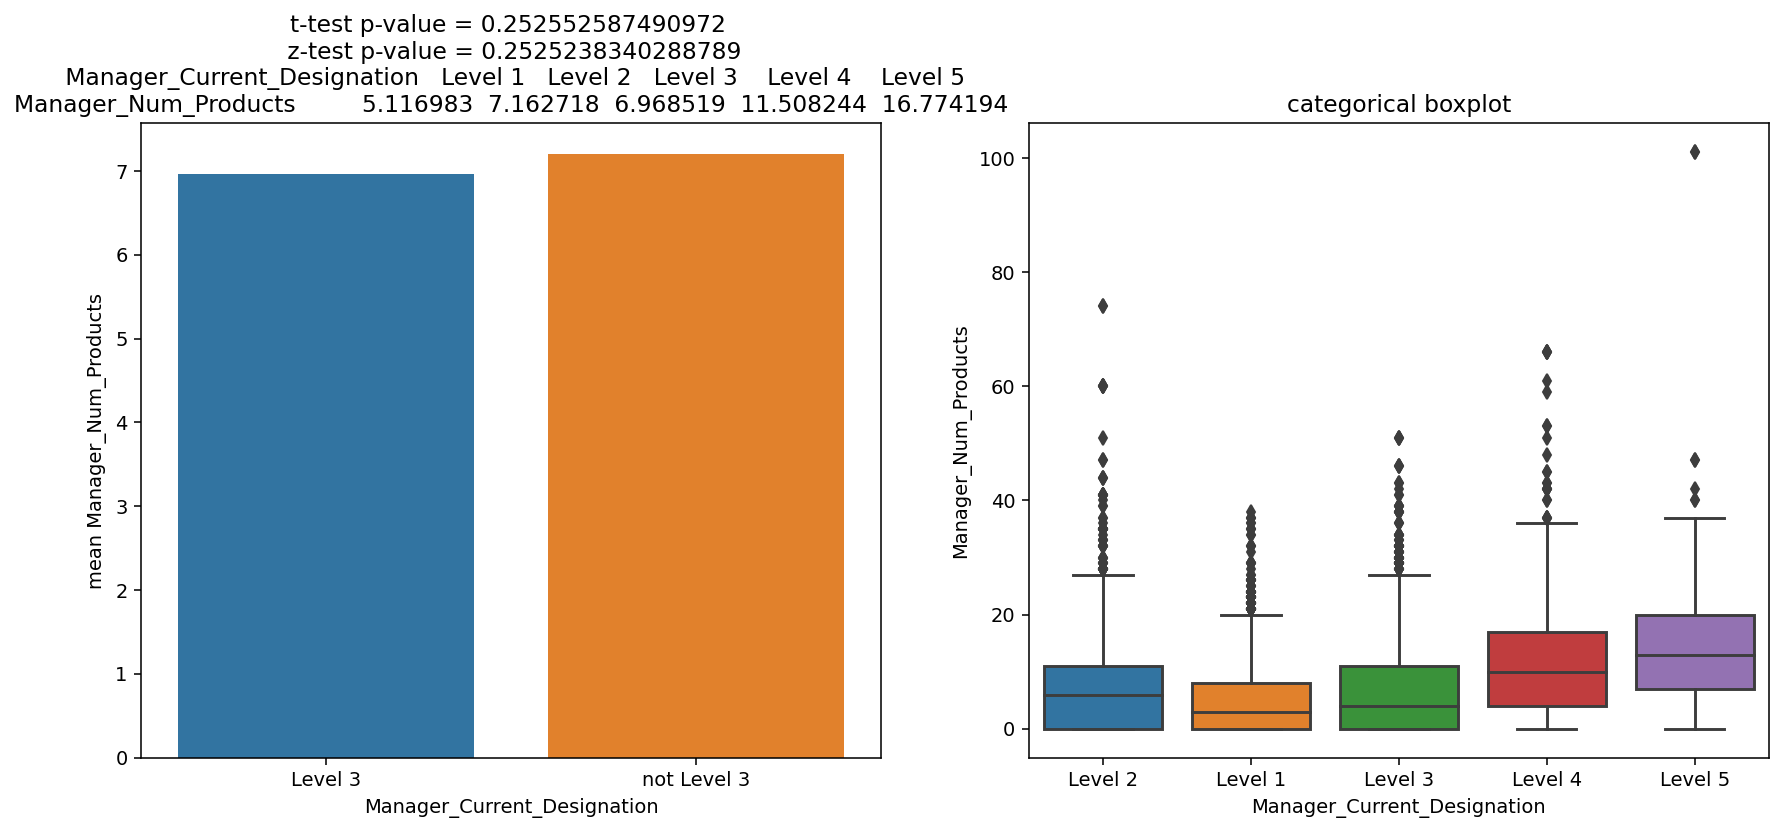

In [ ]:
Bivariate_cont_cat(data, 'Manager_Num_Products', 'Manager_Current_Designation', 'Level 3')